# Lead conversion  Case Study

## Step 1: Importing and Merging Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [3]:
pd.set_option("display.max_columns",200)
pd.set_option("display.max_rows",200)

In [4]:
# Importing dataset
lead_data = pd.read_csv("Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Let's check the dimensions of the dataframe
lead_data.shape

(9240, 37)

In [6]:
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
lead_data.describe(include=object)

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9204,9240,9240,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,9240,9240,9240
unique,9240,5,21,2,2,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,Landing Page Submission,Google,No,No,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,No,No,Modified
freq,1,4886,2868,8506,9238,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,9240,6352,3407


In [8]:
lead_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [9]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [10]:
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [11]:
a=lead_data.isnull().sum().sort_values(ascending=False)*100/lead_data.shape[0]
a

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [12]:
## converting some yes/ no variables to 1/0

In [13]:
# List of variables to map

varlist =['Do Not Email', 'Do Not Call', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({"Yes": 1, "No": 0})

# Applying the function to the housing list
lead_data[varlist] = lead_data[varlist].apply(binary_map)

In [14]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [15]:
# converting " Select" in all over data to NaN as that is equivalent to blank
lead_data=lead_data.replace("Select",np.NaN)
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,NaN,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,NaN,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [16]:
a=lead_data.isnull().sum().sort_values(ascending=False)*100/lead_data.shape[0]
a

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

## Step 2 : Handling missing values

In [17]:
# dropping columns with missing values >45%
col_to_drop=a[a>45].keys()
lead_data.drop(col_to_drop,axis=1,inplace=True)
#checking null values % after dropping columns with % of missing value >45%
b=lead_data.isnull().sum().sort_values(ascending=False)*100/len(lead_data)
b

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

In [18]:
# Missing values to be handled for each columns individually.

In [19]:
# To impute missing values in City
lead_data["City"].value_counts(normalize=True,dropna=False)

NaN                            0.397078
Mumbai                         0.348701
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

In [20]:
# Major % people are from mumbai so impute empty values with "Mumbai"
lead_data["City"]=lead_data["City"].replace(np.NaN,"Mumbai")
lead_data["City"].value_counts(normalize=True,dropna=False)


Mumbai                         0.745779
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

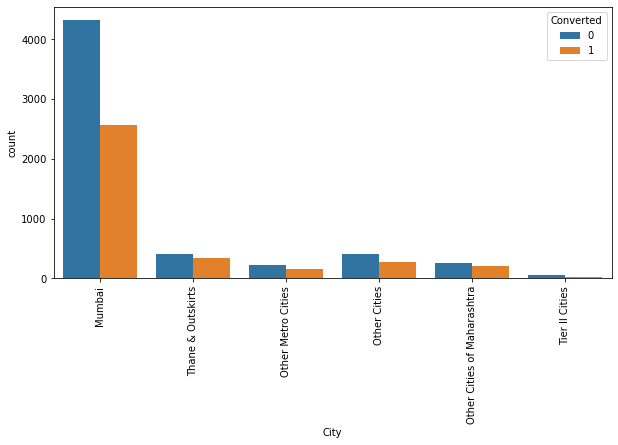

In [21]:
#plotting spread of City columnn after replacing NaN values

plt.figure(figsize=(10,5))
s1=sns.countplot(lead_data.City, hue=lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [22]:
# To impute missing values in Specialization
lead_data["Specialization"].value_counts(normalize=True,dropna=False)

NaN                                  0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

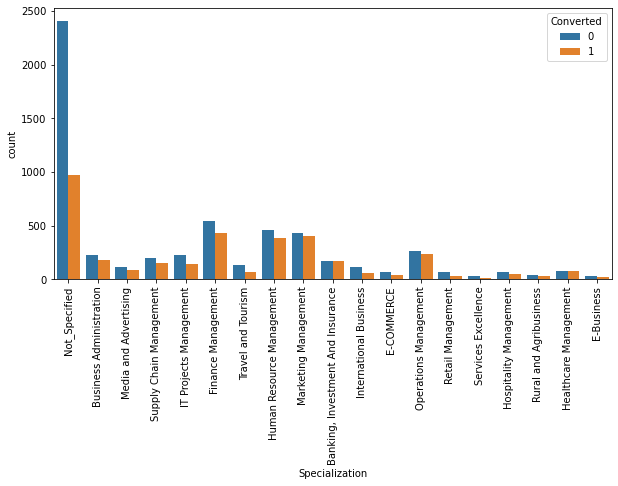

In [23]:
# 36% people have not specified because either they may be student or may not be having any specialization
lead_data["Specialization"]=lead_data["Specialization"].replace(np.NaN,"Not_Specified")

#plotting spread of specialization columnn after replacing NaN values

plt.figure(figsize=(10,5))
s1=sns.countplot(lead_data.Specialization, hue=lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

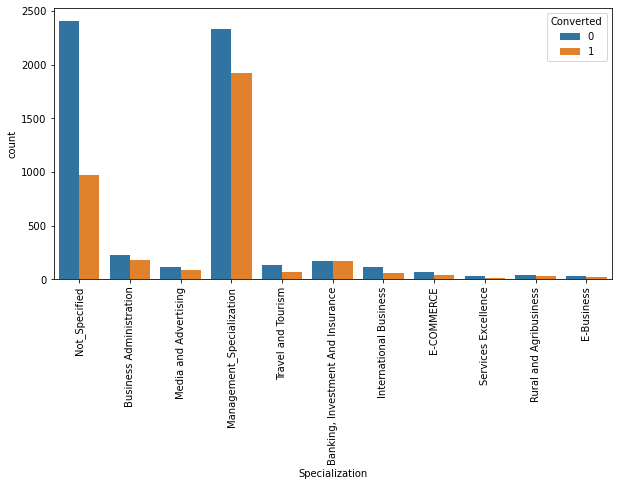

In [24]:
# we can see specialization with mangaement have more number of leads and more number of people are converted, so even though 36% are not specified we will not drop this column.
lead_data["Specialization"]=lead_data["Specialization"].replace(['Finance Management','Human Resource Management','Marketing Management','Operations Management','IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management'],"Management_Specialization")
#plotting spread of specialization columnn after combining management specialization

plt.figure(figsize=(10,5))
s1=sns.countplot(lead_data.Specialization, hue=lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [25]:
# To impute missing values in Tags
lead_data["Tags"].value_counts(normalize=True,dropna=False)

NaN                                                  0.362879
Will revert after reading the email                  0.224242
Ringing                                              0.130195
Interested in other courses                          0.055519
Already a student                                    0.050325
Closed by Horizzon                                   0.038745
switched off                                         0.025974
Busy                                                 0.020130
Lost to EINS                                         0.018939
Not doing further education                          0.015693
Interested  in full time MBA                         0.012662
Graduation in progress                               0.012013
invalid number                                       0.008983
Diploma holder (Not Eligible)                        0.006818
wrong number given                                   0.005087
opp hangup                                           0.003571
number n

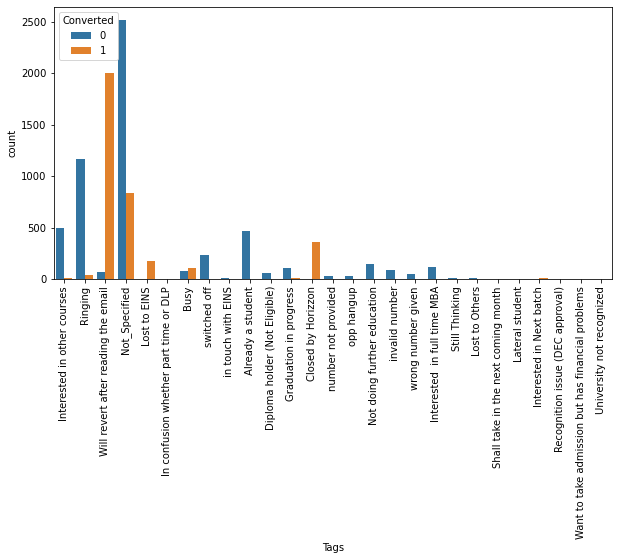

['Interested in other courses' 'Ringing'
 'Will revert after reading the email' 'Not_Specified' 'Lost to EINS'
 'In confusion whether part time or DLP' 'Busy' 'switched off'
 'in touch with EINS' 'Already a student' 'Diploma holder (Not Eligible)'
 'Graduation in progress' 'Closed by Horizzon' 'number not provided'
 'opp hangup' 'Not doing further education' 'invalid number'
 'wrong number given' 'Interested  in full time MBA' 'Still Thinking'
 'Lost to Others' 'Shall take in the next coming month' 'Lateral student'
 'Interested in Next batch' 'Recognition issue (DEC approval)'
 'Want to take admission but has financial problems'
 'University not recognized']


In [26]:
# 36% people have not specified so mention not specified for them
lead_data["Tags"]=lead_data["Tags"].replace(np.NaN,"Not_Specified")

#plotting spread of Tags columnn after replacing NaN values

plt.figure(figsize=(10,5))
s1=sns.countplot(lead_data.Tags, hue=lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

print(lead_data["Tags"].unique())

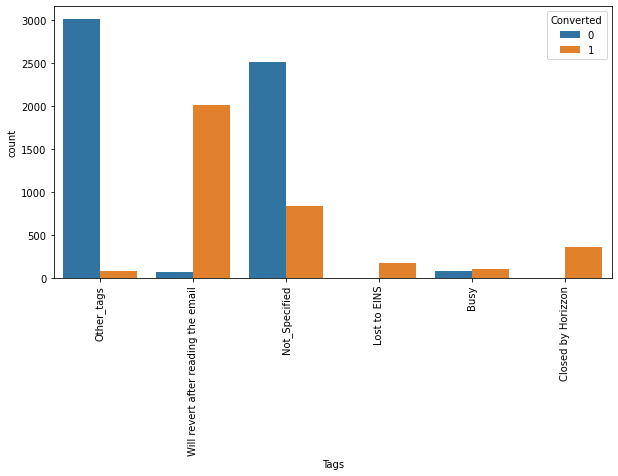

In [27]:
# convert tags with very less frequency of conversion to "other tags"
lead_data["Tags"]=lead_data["Tags"].replace(['Interested in other courses','Ringing',
 'In confusion whether part time or DLP','switched off',
 'in touch with EINS','Already a student','Diploma holder (Not Eligible)',
 'Graduation in progress','number not provided',
 'opp hangup','Not doing further education','invalid number',
 'wrong number given','Interested  in full time MBA','Still Thinking',
 'Lost to Others','Shall take in the next coming month','Lateral student',
 'Interested in Next batch','Recognition issue (DEC approval)',
 'Want to take admission but has financial problems',
 'University not recognized'],"Other_tags")
#plotting spread of Tags columnn after combining tags with less frequency of conversion

plt.figure(figsize=(10,5))
s1=sns.countplot(lead_data.Tags, hue=lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [28]:
# handling missing values in "What matters most to you in choosing a course"
lead_data["What matters most to you in choosing a course"].value_counts(normalize=True,dropna=False)

Better Career Prospects      0.706494
NaN                          0.293182
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

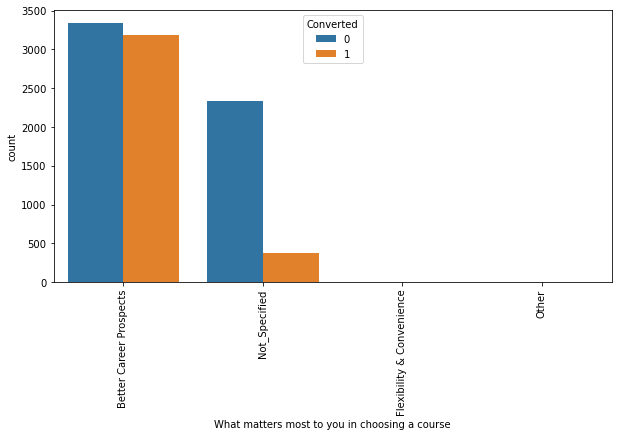

['Better Career Prospects' 'Not_Specified' 'Flexibility & Convenience'
 'Other']


In [29]:
# replace NaN with " not specified"
lead_data["What matters most to you in choosing a course"]=lead_data["What matters most to you in choosing a course"].replace(np.NaN,"Not_Specified")
# Visualize the distribution
plt.figure(figsize=(10,5))
s1=sns.countplot(lead_data["What matters most to you in choosing a course"], hue=lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

print(lead_data["What matters most to you in choosing a course"].unique())

In [30]:
# since distribution of " better career aspects " and not specified is not similar so we won't combine these two. instead we will combine better carrer aspects and other values as that won't make much difference.
lead_data["What matters most to you in choosing a course"]=lead_data["What matters most to you in choosing a course"].replace(['Better Career Prospects','Flexibility & Convenience','Other'],"Better Career Prospects & others")


In [31]:
# handing missing values for "What is your current occupation"
lead_data["What is your current occupation"].value_counts(normalize=True, dropna=False)

Unemployed              0.606061
NaN                     0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

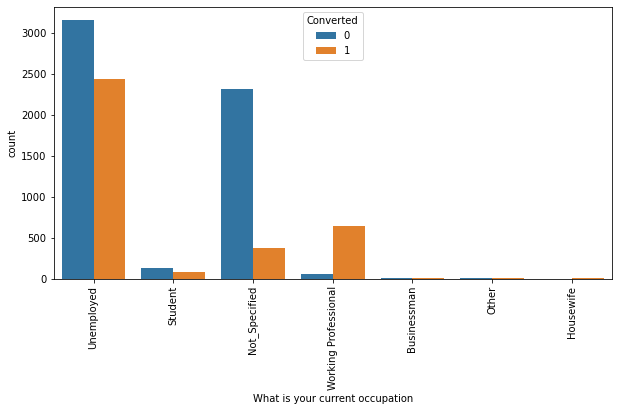

In [32]:
# imputing NaN values with not specified and checking the distribution
lead_data["What is your current occupation"]=lead_data["What is your current occupation"].replace(np.NaN,"Not_Specified")

plt.figure(figsize=(10,5))
s1=sns.countplot(lead_data["What is your current occupation"], hue=lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

# since distribution of unemployed and not speified is not similar so we won't combine them.

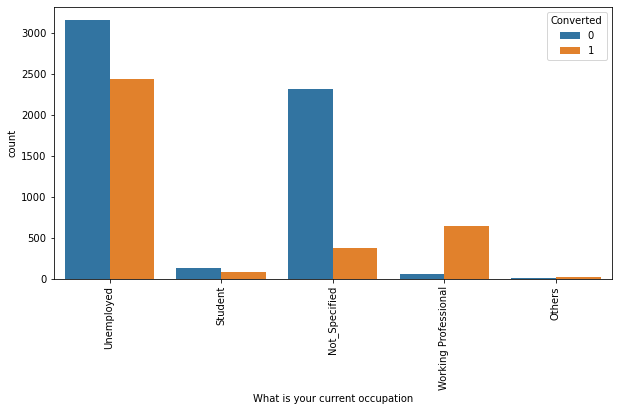

In [33]:
# combine Businessman, other & housewife as they contribute to <1% data
lead_data["What is your current occupation"]=lead_data["What is your current occupation"].replace(["Businessman","Other","Housewife"],"Others")

plt.figure(figsize=(10,5))
s1=sns.countplot(lead_data["What is your current occupation"], hue=lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [34]:
# To impute missing values in Country
lead_data["Country"].value_counts(normalize=True,dropna=False)

India                   0.702597
NaN                     0.266342
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Bahrain                 0.000758
Hong Kong               0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
Kuwait                  0.000433
South Africa            0.000433
Canada                  0.000433
Nigeria                 0.000433
Germany                 0.000433
Sweden                  0.000325
Philippines             0.000216
Uganda                  0.000216
Italy                   0.000216
Bangladesh              0.000216
Netherlands             0.000216
Asia/Pacific Region     0.000216
China                   0.000216
Belgium                 0.000216
Ghana                   0.000216
Kenya                   0.000108
Sri Lanka 

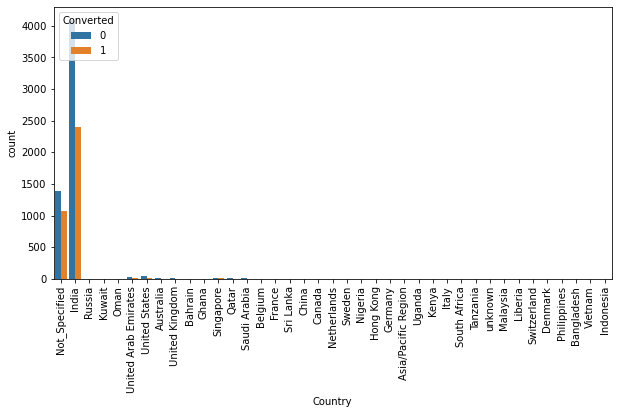

In [35]:
# imputing NaN values with not specified and checking the distribution
lead_data["Country"]=lead_data["Country"].replace(np.NaN,"Not_Specified")

plt.figure(figsize=(10,5))
s1=sns.countplot(lead_data["Country"], hue=lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


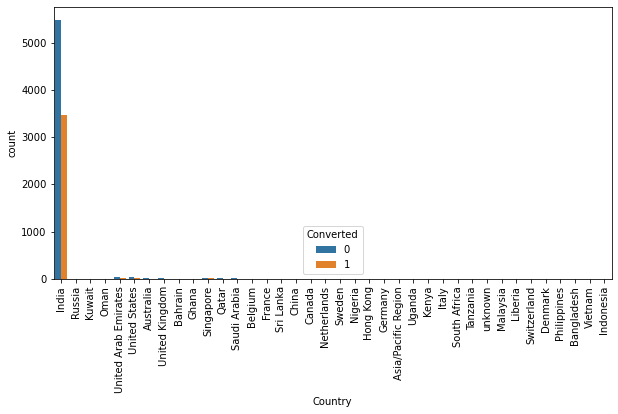

In [36]:
# since distribution of not_specified and India is similar and India alone contribute to 70% of distribution. Combining Not specified with india will contbitute to 96% of data so better to drop this column.
lead_data["Country"]=lead_data["Country"].replace("Not_Specified","India")

plt.figure(figsize=(10,5))
s1=sns.countplot(lead_data["Country"], hue=lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()



In [37]:
lead_data.drop("Country",axis=1,inplace=True)

In [38]:
# To impute missing values in Last Activity
lead_data["Last Activity"].value_counts(normalize=True,dropna=False)

Email Opened                    0.371970
SMS Sent                        0.297078
Olark Chat Conversation         0.105303
Page Visited on Website         0.069264
Converted to Lead               0.046320
Email Bounced                   0.035281
Email Link Clicked              0.028896
Form Submitted on Website       0.012554
NaN                             0.011147
Unreachable                     0.010065
Unsubscribed                    0.006602
Had a Phone Conversation        0.003247
Approached upfront              0.000974
View in browser link Clicked    0.000649
Email Received                  0.000216
Email Marked Spam               0.000216
Visited Booth in Tradeshow      0.000108
Resubscribed to emails          0.000108
Name: Last Activity, dtype: float64

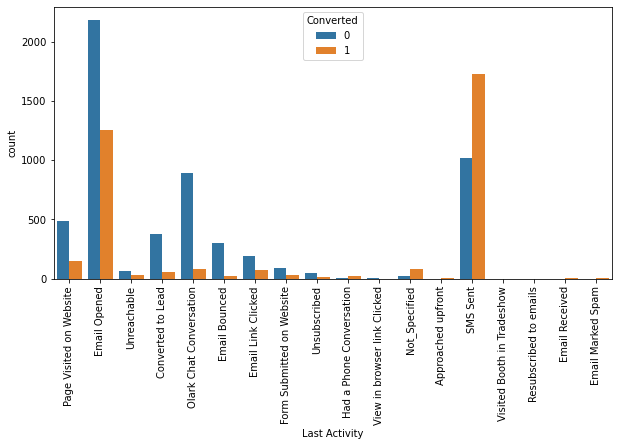

['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Unsubscribed'
 'Had a Phone Conversation' 'View in browser link Clicked' 'Not_Specified'
 'Approached upfront' 'SMS Sent' 'Visited Booth in Tradeshow'
 'Resubscribed to emails' 'Email Received' 'Email Marked Spam']


In [39]:
# imputing NaN values with not specified and checking the distribution
lead_data["Last Activity"]=lead_data["Last Activity"].replace(np.NaN,"Not_Specified")

plt.figure(figsize=(10,5))
s1=sns.countplot(lead_data["Last Activity"], hue=lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

print(lead_data["Last Activity"].unique())

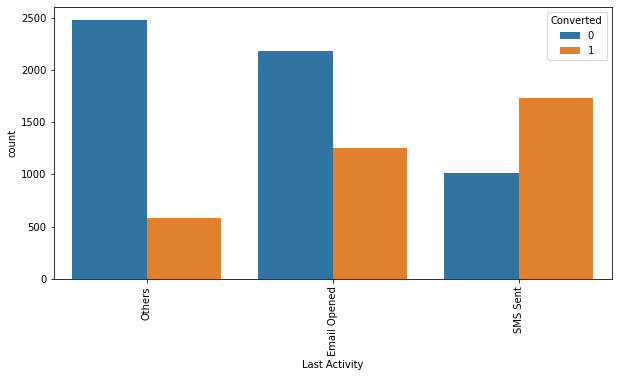

In [40]:
# combining low frequency variables into "Others" as they have similar pattern
lead_data["Last Activity"]=lead_data["Last Activity"].replace(['Unreachable',
 'Converted to Lead','Email Bounced',
 'Email Link Clicked','Form Submitted on Website','Unsubscribed',
 'Had a Phone Conversation','View in browser link Clicked','Not_Specified',
 'Approached upfront','Visited Booth in Tradeshow',
 'Resubscribed to emails','Email Received','Email Marked Spam','Olark Chat Conversation','Page Visited on Website'],"Others")

plt.figure(figsize=(10,5))
s1=sns.countplot(lead_data["Last Activity"], hue=lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


In [41]:
# To impute missing values in Lead Source
lead_data["Lead Source"].value_counts(normalize=True,dropna=False)

Google               0.310390
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
NaN                  0.003896
bing                 0.000649
google               0.000541
Click2call           0.000433
Press_Release        0.000216
Social Media         0.000216
Live Chat            0.000216
youtubechannel       0.000108
testone              0.000108
Pay per Click Ads    0.000108
welearnblog_Home     0.000108
WeLearn              0.000108
blog                 0.000108
NC_EDM               0.000108
Name: Lead Source, dtype: float64

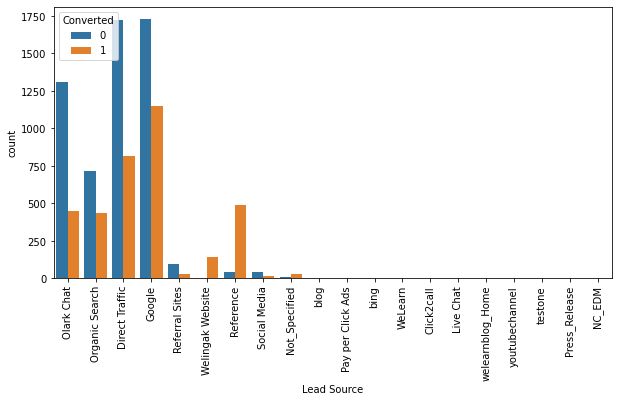

['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'Social Media' 'Not_Specified' 'blog'
 'Pay per Click Ads' 'bing' 'WeLearn' 'Click2call' 'Live Chat'
 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release' 'NC_EDM']


In [42]:
# imputing NaN values with not specified and checking the distribution
lead_data["Lead Source"]=lead_data["Lead Source"].replace(np.NaN,"Not_Specified")
lead_data["Lead Source"]=lead_data["Lead Source"].replace("google","Google")
lead_data["Lead Source"]=lead_data["Lead Source"].replace("Facebook","Social Media")

plt.figure(figsize=(10,5))
s1=sns.countplot(lead_data["Lead Source"], hue=lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

print(lead_data["Lead Source"].unique())

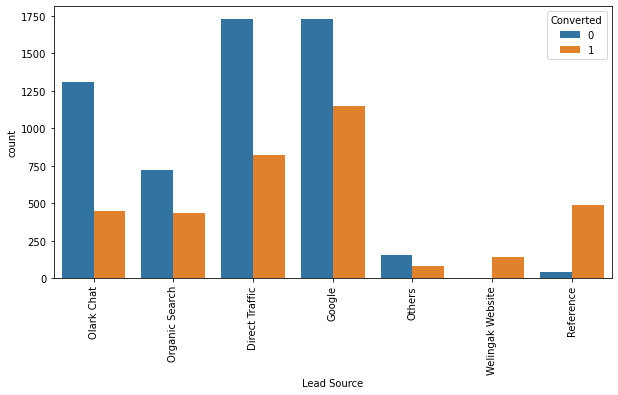

In [43]:
# combining low frequency variables into "Others" as they have similar pattern
lead_data["Lead Source"]=lead_data["Lead Source"].replace(['Referral Sites',
 'Social Media','Not_Specified','blog',
 'Pay per Click Ads','bing','WeLearn','Click2call','Live Chat',
 'welearnblog_Home','youtubechannel','testone','Press_Release','NC_EDM'],"Others")

plt.figure(figsize=(10,5))
s1=sns.countplot(lead_data["Lead Source"], hue=lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [44]:
# checking number of null values in each columns
lead_data.isnull().sum().sort_values(ascending=False)

TotalVisits                                      137
Page Views Per Visit                             137
Prospect ID                                        0
Newspaper Article                                  0
A free copy of Mastering The Interview             0
I agree to pay the amount through cheque           0
City                                               0
Get updates on DM Content                          0
Update me on Supply Chain Content                  0
Tags                                               0
Receive More Updates About Our Courses             0
Through Recommendations                            0
Digital Advertisement                              0
Newspaper                                          0
X Education Forums                                 0
Search                                             0
Magazine                                           0
Lead Number                                        0
What matters most to you in choosing a course 

In [45]:
# checking % of null values in each columns
lead_data.isnull().sum().sort_values(ascending=False)*100/len(lead_data)

TotalVisits                                      1.482684
Page Views Per Visit                             1.482684
Prospect ID                                      0.000000
Newspaper Article                                0.000000
A free copy of Mastering The Interview           0.000000
I agree to pay the amount through cheque         0.000000
City                                             0.000000
Get updates on DM Content                        0.000000
Update me on Supply Chain Content                0.000000
Tags                                             0.000000
Receive More Updates About Our Courses           0.000000
Through Recommendations                          0.000000
Digital Advertisement                            0.000000
Newspaper                                        0.000000
X Education Forums                               0.000000
Search                                           0.000000
Magazine                                         0.000000
Lead Number   

In [46]:
# view rows with null values
lead_data[lead_data["TotalVisits"].isna()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
77,895d4905-f534-4f18-915b-8d239a72b5dc,659722,Lead Add Form,Welingak Website,0,0,1,NaN,1096,NaN,Others,Not_Specified,Unemployed,Better Career Prospects & others,0,0,0,0,0,0,0,0,Not_Specified,0,0,Mumbai,0,0,Modified
79,3a0ce10f-d2c1-4213-a2bc-4f97bcd29699,659710,Lead Add Form,Reference,0,0,1,NaN,705,NaN,Others,Management_Specialization,Working Professional,Better Career Prospects & others,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Thane & Outskirts,0,0,Modified
81,277ad6a6-4565-4a18-a1ff-e46e03f22663,659705,Lead Add Form,Welingak Website,0,0,1,NaN,346,NaN,Others,Not_Specified,Unemployed,Better Career Prospects & others,0,0,0,0,0,0,0,0,Not_Specified,0,0,Mumbai,0,0,Modified
88,68f496c2-0073-470f-9c3c-7fb48f060ce5,659631,Lead Add Form,Reference,0,0,1,NaN,1007,NaN,Others,Management_Specialization,Unemployed,Better Career Prospects & others,0,0,0,0,0,0,0,0,Closed by Horizzon,0,0,Mumbai,0,0,Modified
120,144807db-2895-4002-b52e-3eda79c22395,659283,Lead Add Form,Reference,0,0,1,NaN,1111,NaN,Others,Management_Specialization,Working Professional,Better Career Prospects & others,0,0,0,0,0,0,0,0,Closed by Horizzon,0,0,Other Cities,0,0,Modified
133,63ebde80-a465-4cdc-ab5a-5e880a7138b0,659158,Lead Add Form,Reference,0,0,1,NaN,986,NaN,Others,Management_Specialization,Working Professional,Better Career Prospects & others,0,0,0,0,0,0,0,0,Closed by Horizzon,0,0,Mumbai,0,0,Modified
134,0298b9a5-fedb-408b-a284-2d357583600f,659153,Lead Add Form,Welingak Website,0,0,1,NaN,889,NaN,Others,Not_Specified,Unemployed,Better Career Prospects & others,0,0,0,0,0,0,0,0,Not_Specified,0,0,Mumbai,0,0,Modified
177,3b74e995-4407-44de-9e59-622afb514261,658648,Lead Add Form,Welingak Website,0,0,1,NaN,1240,NaN,Others,Not_Specified,Unemployed,Better Career Prospects & others,0,0,0,0,0,0,0,0,Closed by Horizzon,0,0,Mumbai,0,0,Modified
179,1730b5e8-e435-41c6-9082-b9c98976bd16,658627,Lead Add Form,Welingak Website,0,0,1,NaN,458,NaN,Others,Not_Specified,Unemployed,Better Career Prospects & others,0,0,0,0,0,0,0,0,Not_Specified,0,0,Mumbai,0,0,Modified
180,db2dc4b5-f603-4818-9b0c-0435923a4cd8,658623,Lead Add Form,Welingak Website,0,0,1,NaN,1060,NaN,Others,Not_Specified,Unemployed,Better Career Prospects & others,0,0,0,0,0,0,0,0,Not_Specified,0,0,Mumbai,0,0,Modified


In [47]:
# It seems that for both total visits and pages views per visit, same rows have missing values which contribute to less than 2% of data, so drop these rows for further anlysis.
lead_data=lead_data[lead_data["TotalVisits"].isna()==False]

# Checking % of missing values in each columns after removing NaN values from above two columns.
lead_data.isnull().sum().sort_values(ascending=False)*100/len(lead_data)

Prospect ID                                      0.0
Magazine                                         0.0
A free copy of Mastering The Interview           0.0
I agree to pay the amount through cheque         0.0
City                                             0.0
Get updates on DM Content                        0.0
Update me on Supply Chain Content                0.0
Tags                                             0.0
Receive More Updates About Our Courses           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Search                                           0.0
Lead Number                                      0.0
What matters most to you in choosing a course    0.0
What is your current occupation                  0.0
Specialization                                

In [48]:
lead_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [49]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

# data seems to be of balance nature, otherwise interpretation would not have any value.

38.02043282434362

In [50]:
lead_data.describe()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.0,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.0,9103.0,9103.0,9103.0,9103.000000
mean,617027.742612,0.079534,0.000220,0.380204,3.445238,481.350104,2.362820,0.001538,0.0,0.000220,0.000110,0.000110,0.000439,0.000769,0.0,0.0,0.0,0.0,0.317258
std,23337.138926,0.270586,0.014822,0.485464,4.854853,545.066142,2.161418,0.039189,0.0,0.014822,0.010481,0.010481,0.020959,0.027721,0.0,0.0,0.0,0.0,0.465434
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,596408.000000,0.000000,0.000000,0.000000,1.000000,9.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
50%,615278.000000,0.000000,0.000000,0.000000,3.000000,244.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
75%,637166.000000,0.000000,0.000000,1.000000,5.000000,919.500000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
max,660737.000000,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000


## Step 3: Data analysis

In [51]:
#DIVIDING DATA INTO 2 SETS for analysis purpose
df_0=lead_data[lead_data["Converted"]==0]
df_1=lead_data[lead_data["Converted"]==1]


Not converted 0    5030
1     612
Name: Do Not Email, dtype: int64 

Converted 0    3349
1     112
Name: Do Not Email, dtype: int64 




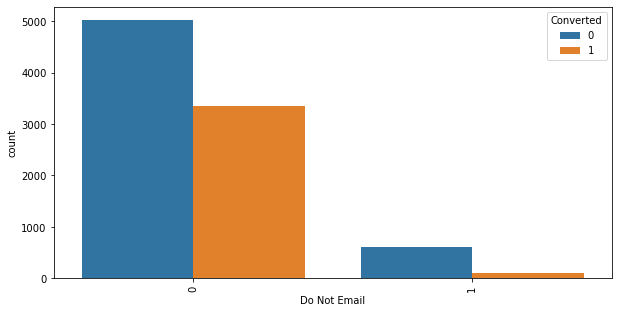

Not converted 0    5642
Name: Do Not Call, dtype: int64 

Converted 0    3459
1       2
Name: Do Not Call, dtype: int64 




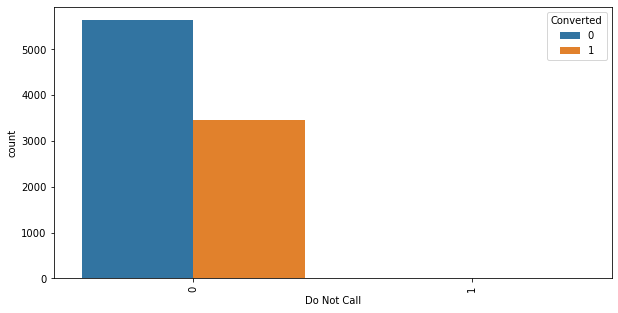

Not converted 0    5642
Name: Converted, dtype: int64 

Converted 1    3461
Name: Converted, dtype: int64 




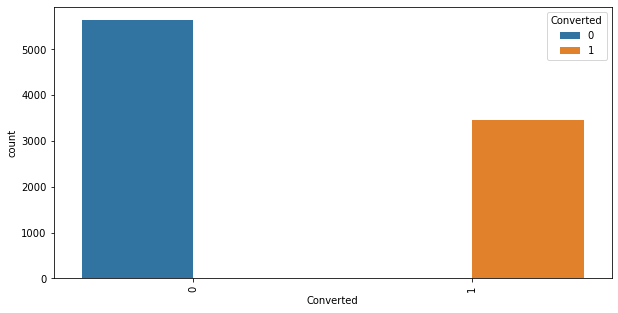

Not converted 0       1277
60        18
75        18
74        17
127       16
        ... 
1771       1
1462       1
678        1
971        1
1770       1
Name: Total Time Spent on Website, Length: 1217, dtype: int64 

Converted 0       916
1494      7
1290      7
1019      7
1298      7
       ... 
1891      1
1667      1
1418      1
1613      1
499       1
Name: Total Time Spent on Website, Length: 1335, dtype: int64 




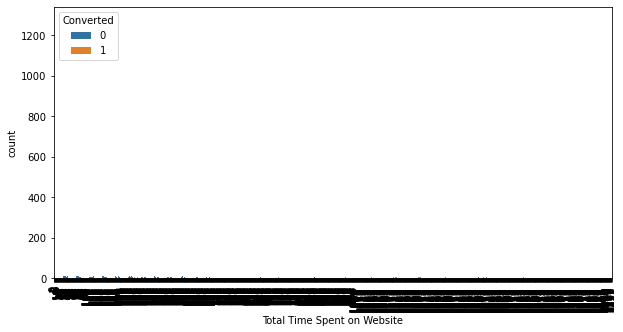

Not converted 0    5633
1       9
Name: Search, dtype: int64 

Converted 0    3456
1       5
Name: Search, dtype: int64 




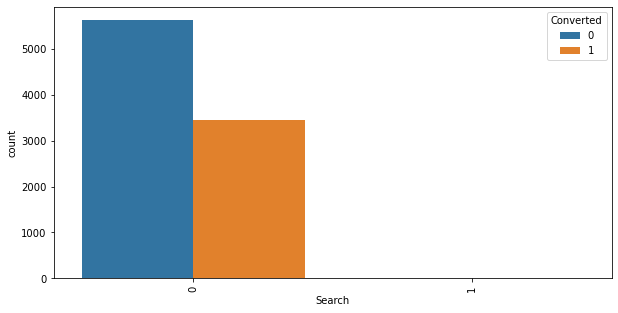

Not converted 0    5642
Name: Magazine, dtype: int64 

Converted 0    3461
Name: Magazine, dtype: int64 




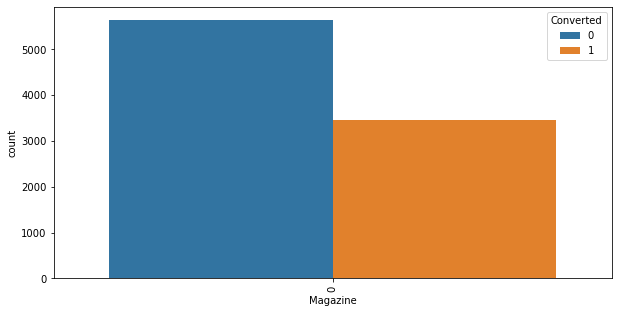

Not converted 0    5641
1       1
Name: Newspaper Article, dtype: int64 

Converted 0    3460
1       1
Name: Newspaper Article, dtype: int64 




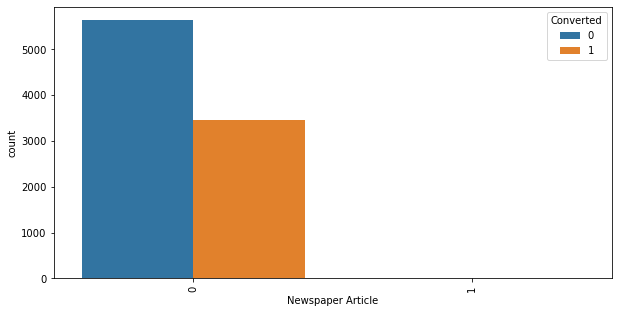

Not converted 0    5641
1       1
Name: X Education Forums, dtype: int64 

Converted 0    3461
Name: X Education Forums, dtype: int64 




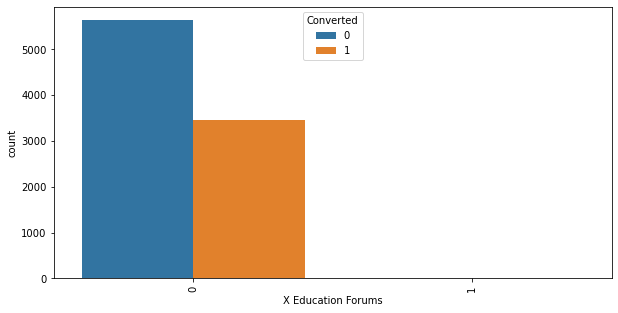

Not converted 0    5641
1       1
Name: Newspaper, dtype: int64 

Converted 0    3461
Name: Newspaper, dtype: int64 




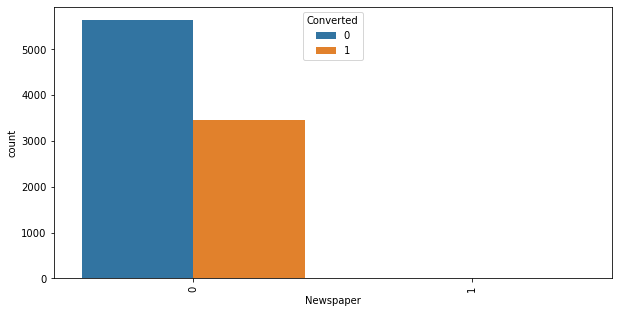

Not converted 0    5639
1       3
Name: Digital Advertisement, dtype: int64 

Converted 0    3460
1       1
Name: Digital Advertisement, dtype: int64 




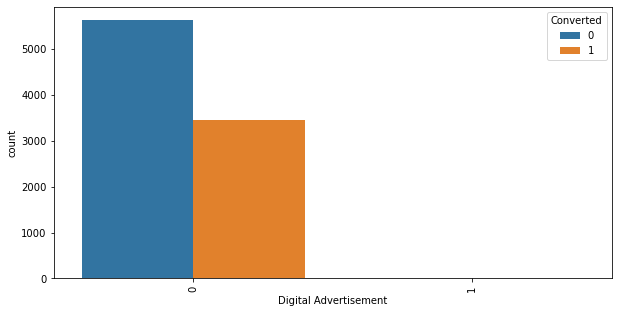

Not converted 0    5640
1       2
Name: Through Recommendations, dtype: int64 

Converted 0    3456
1       5
Name: Through Recommendations, dtype: int64 




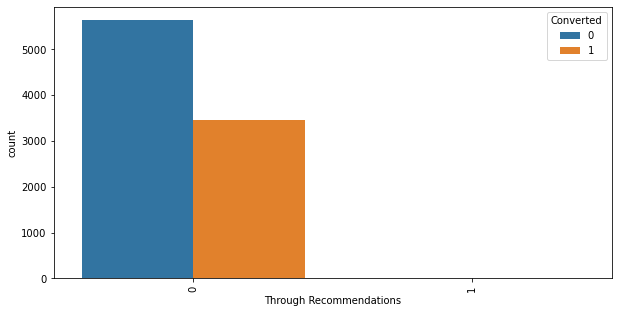

Not converted 0    5642
Name: Receive More Updates About Our Courses, dtype: int64 

Converted 0    3461
Name: Receive More Updates About Our Courses, dtype: int64 




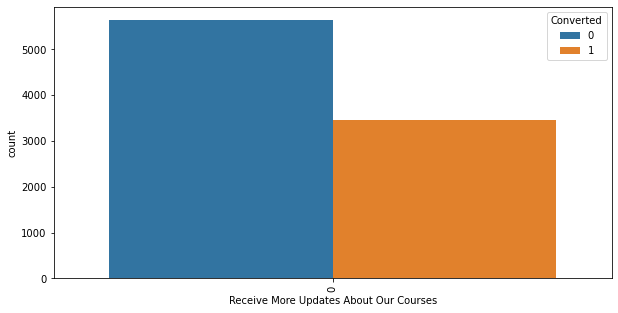

Not converted 0    5642
Name: Update me on Supply Chain Content, dtype: int64 

Converted 0    3461
Name: Update me on Supply Chain Content, dtype: int64 




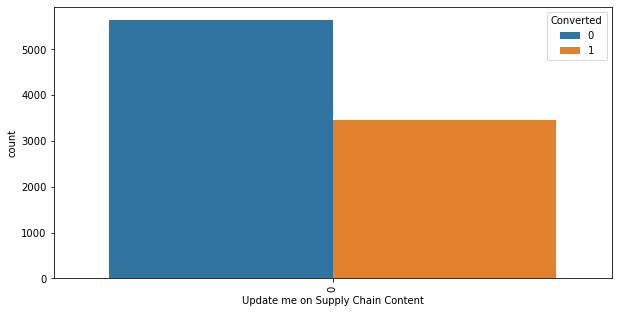

Not converted 0    5642
Name: Get updates on DM Content, dtype: int64 

Converted 0    3461
Name: Get updates on DM Content, dtype: int64 




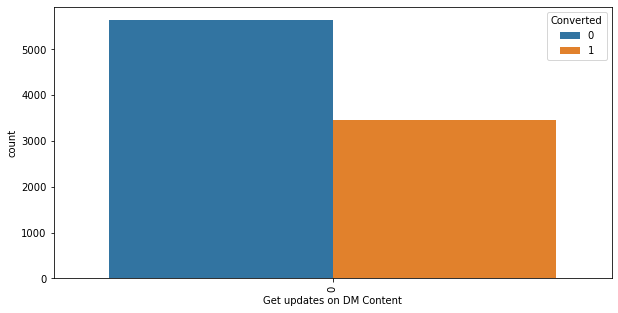

Not converted 0    5642
Name: I agree to pay the amount through cheque, dtype: int64 

Converted 0    3461
Name: I agree to pay the amount through cheque, dtype: int64 




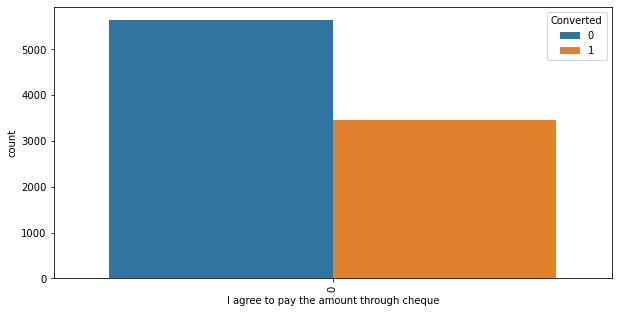

Not converted 0    3784
1    1858
Name: A free copy of Mastering The Interview, dtype: int64 

Converted 0    2431
1    1030
Name: A free copy of Mastering The Interview, dtype: int64 




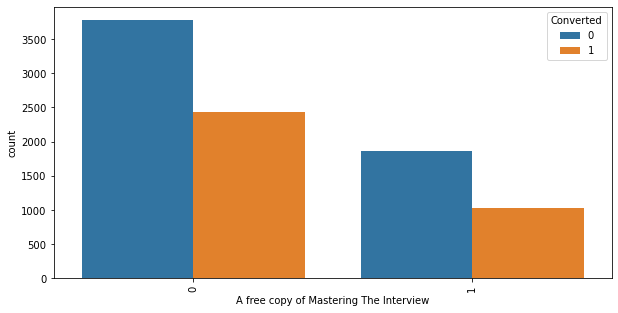

In [52]:
# interpretation can be done for all numerical variables by plotting their distribution %.
x=lead_data.drop("Lead Number", axis=1)
for i in x.columns:
    
    if(x[i].dtypes=="int64"):
        print("Not converted",df_0[i].value_counts(),"\n")
        print("Converted",df_1[i].value_counts(),"\n\n")
        plt.figure(figsize=(10,5))
        s1=sns.countplot(lead_data[i], hue=lead_data.Converted)
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
        plt.show()
        

In [53]:
# from above anlysis it is concluded that following columns to be dropped as they won't add value as either they have same data for nearly 99% of there data.
# also DO Not Email variable to be removed as it contributed to only 8% of people do not email and distribution is same for do not mail or mailed.
Col_to_drop=["Do Not Email","Do Not Call","Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque"]
lead_data.drop(Col_to_drop, axis=1, inplace=True)
lead_data.describe()

# Total time spent on website to be anlysed differently.

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000
mean,617027.742612,0.380204,3.445238,481.350104,2.362820,0.317258
std,23337.138926,0.485464,4.854853,545.066142,2.161418,0.465434
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596408.000000,0.000000,1.000000,9.000000,1.000000,0.000000
50%,615278.000000,0.000000,3.000000,244.000000,2.000000,0.000000
75%,637166.000000,1.000000,5.000000,919.500000,3.000000,1.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,1.000000


In [54]:
# To anlyse for outliers in int/ float type variable.

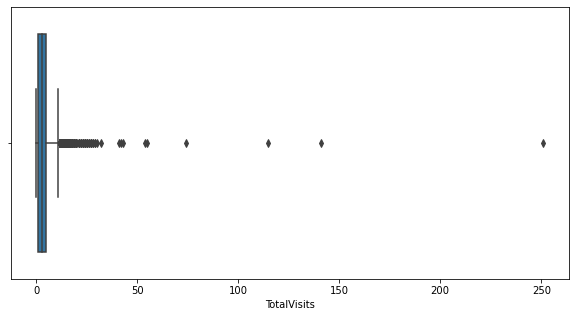

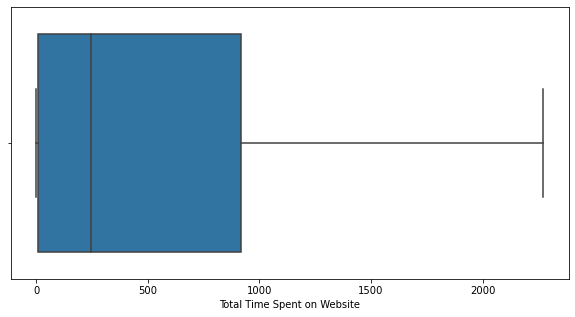

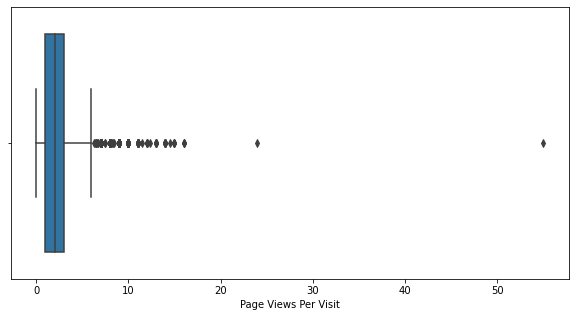

In [55]:
x=lead_data.drop(["Lead Number","Converted","A free copy of Mastering The Interview"], axis=1)
for i in x.columns:
    
    if(x[i].dtypes=="int64" or x[i].dtypes=="float64"):
        plt.figure(figsize=(10,5))
        sns.boxplot(lead_data[i])
        plt.show()
        

In [56]:
# Total visits & Page views per visit seems to have outliers which needs to be handled. 
#Removing top 1% & bottom 1% data from TotalVisits
lead_data= lead_data[lead_data["TotalVisits"]>=lead_data["TotalVisits"].quantile(q=0.01)] 
lead_data= lead_data[lead_data["TotalVisits"]<=lead_data["TotalVisits"].quantile(q=0.99)]
lead_data.shape

(9020, 16)

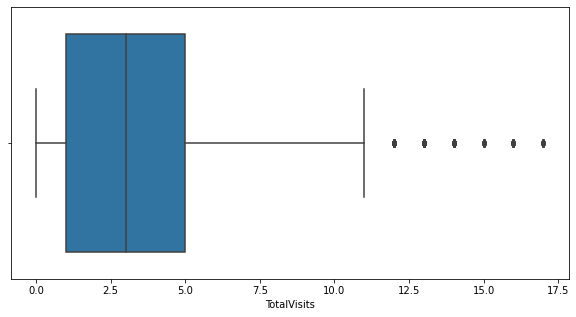

In [57]:
# visualizing box plots after removing outliers
plt.figure(figsize=(10,5))
sns.boxplot(lead_data["TotalVisits"])
plt.show()

In [58]:
#Removing top 1% & bottom 1% data from "Page Views Per Visit"
lead_data= lead_data[lead_data["Page Views Per Visit"]>=lead_data["Page Views Per Visit"].quantile(q=0.01)] 
lead_data= lead_data[lead_data["Page Views Per Visit"]<=lead_data["Page Views Per Visit"].quantile(q=0.99)]
lead_data.shape

(8953, 16)

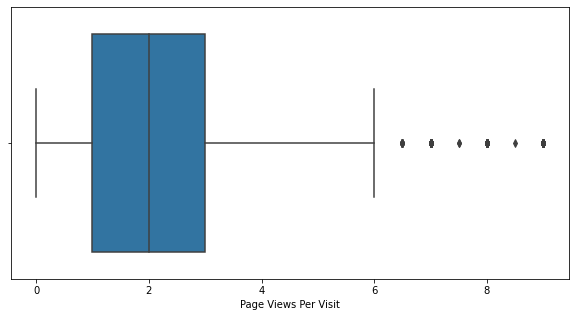

In [59]:
# visualizing box plots after removing outliers
plt.figure(figsize=(10,5))
sns.boxplot(lead_data["Page Views Per Visit"])
plt.show()

## Bivariate analysis for distributed numerical variable

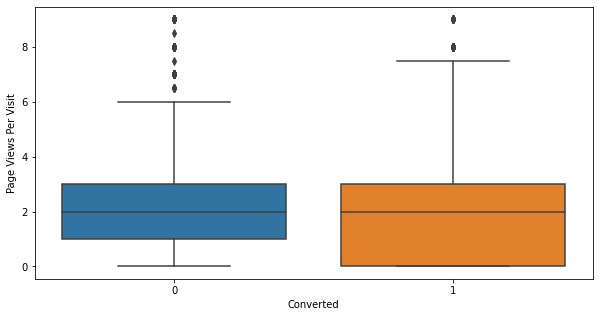

In [60]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Converted",y="Page Views Per Visit",data=lead_data)
plt.show()

# Mean variable is nearly same irrespective of converted or not 
# converted people have higher views per visit

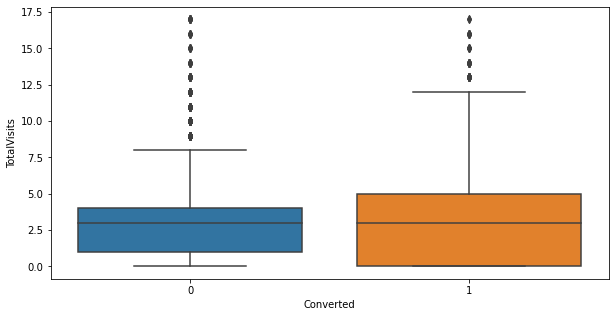

In [61]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Converted",y="TotalVisits",data=lead_data)
plt.show()

# Mean variable is nearly same irrespective of converted or not 
# converted people have higher Totalvisits

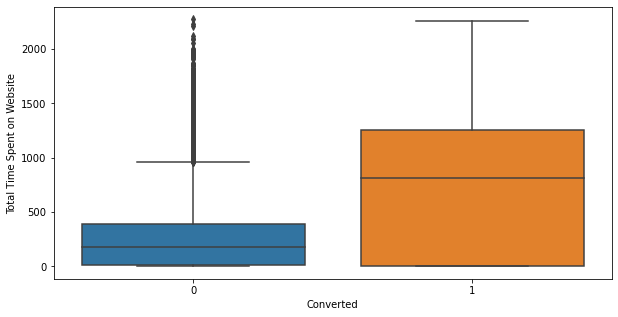

In [62]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Converted",y="Total Time Spent on Website",data=lead_data)
plt.show()

# Converted people spends more time on website as compared to not converted people.

Not converted Landing Page Submission    3118
API                        2463
Lead Add Form                39
Lead Import                  22
Name: Lead Origin, dtype: int64 

Converted Landing Page Submission    1768
API                        1115
Lead Add Form               569
Lead Import                   9
Name: Lead Origin, dtype: int64 




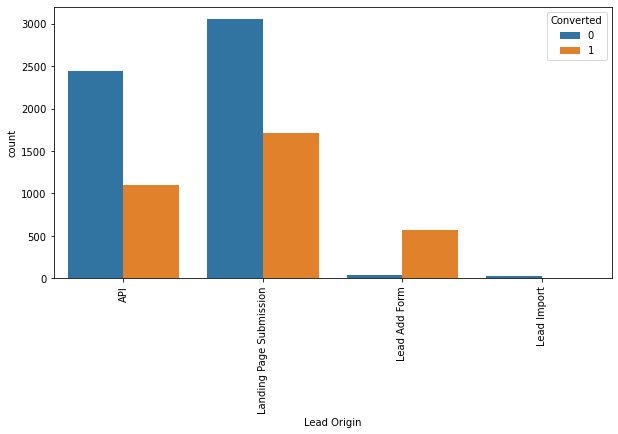

Not converted Google              1726
Direct Traffic      1725
Olark Chat          1305
Organic Search       718
Others               133
Reference             33
Welingak Website       2
Name: Lead Source, dtype: int64 

Converted Google              1147
Direct Traffic       818
Olark Chat           448
Organic Search       436
Reference            410
Welingak Website     127
Others                75
Name: Lead Source, dtype: int64 




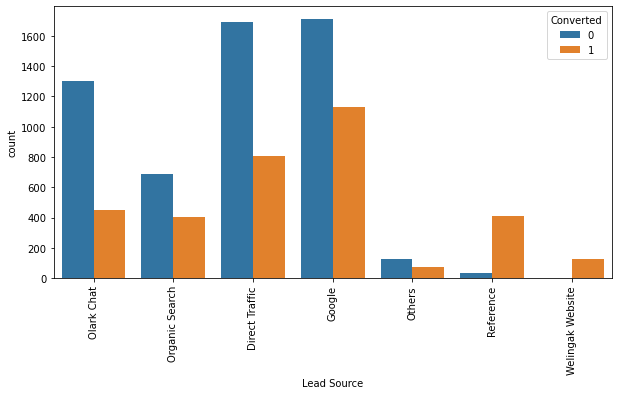

Not converted Others          2446
Email Opened    2184
SMS Sent        1012
Name: Last Activity, dtype: int64 

Converted SMS Sent        1726
Email Opened    1253
Others           482
Name: Last Activity, dtype: int64 




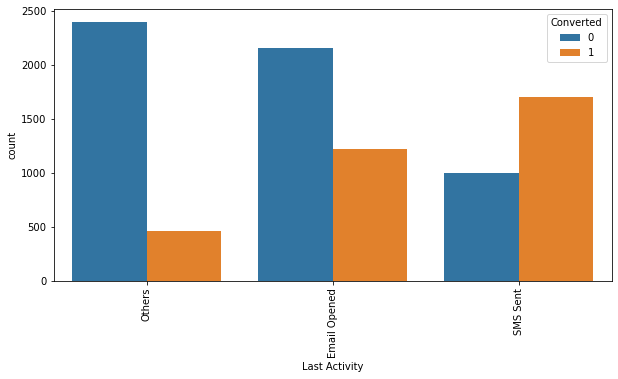

Not converted Not_Specified                        2384
Management_Specialization            2321
Business Administration               224
Banking, Investment And Insurance     171
Travel and Tourism                    131
Media and Advertising                 118
International Business                114
E-COMMERCE                             72
Rural and Agribusiness                 42
E-Business                             36
Services Excellence                    29
Name: Specialization, dtype: int64 

Converted Management_Specialization            1883
Not_Specified                         920
Business Administration               175
Banking, Investment And Insurance     164
Media and Advertising                  84
Travel and Tourism                     71
International Business                 62
E-COMMERCE                             39
Rural and Agribusiness                 31
E-Business                             21
Services Excellence                    11
Name: Specializ

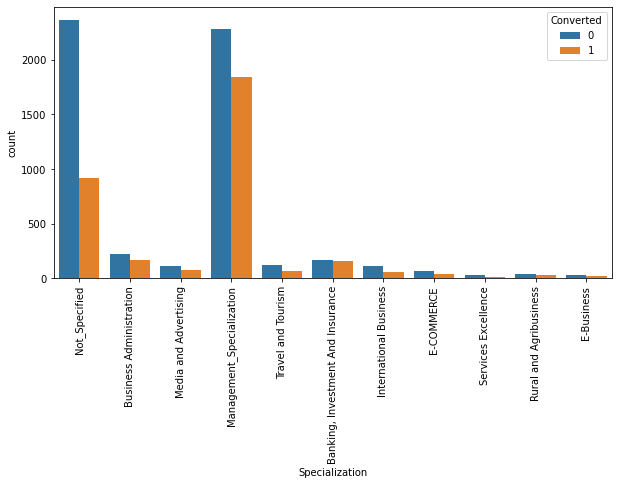

Not converted Unemployed              3133
Not_Specified           2313
Student                  132
Working Professional      55
Others                     9
Name: What is your current occupation, dtype: int64 

Converted Unemployed              2369
Working Professional     624
Not_Specified            370
Student                   75
Others                    23
Name: What is your current occupation, dtype: int64 




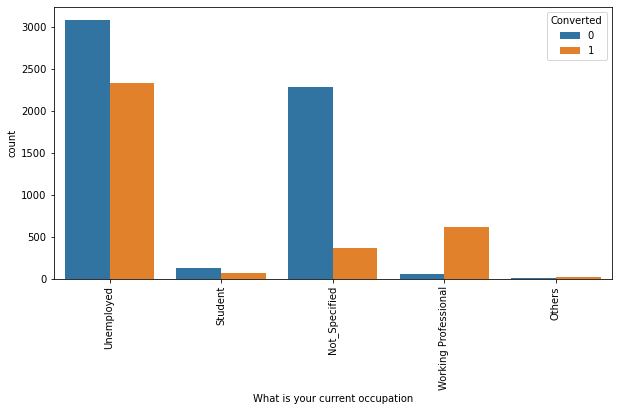

Not converted Better Career Prospects & others    3310
Not_Specified                       2332
Name: What matters most to you in choosing a course, dtype: int64 

Converted Better Career Prospects & others    3091
Not_Specified                        370
Name: What matters most to you in choosing a course, dtype: int64 




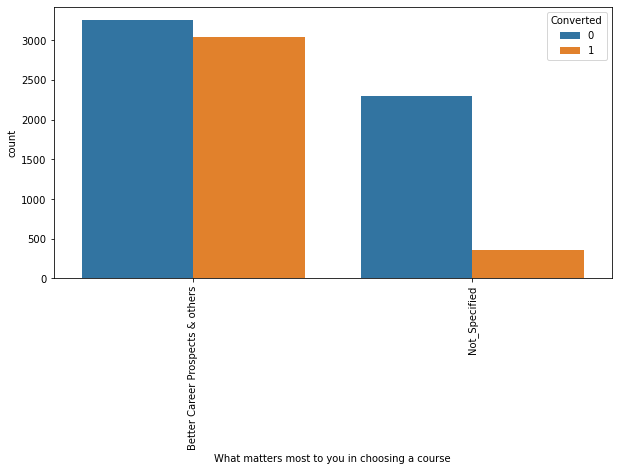

Not converted Other_tags                             2990
Not_Specified                          2507
Busy                                     80
Will revert after reading the email      59
Lost to EINS                              4
Closed by Horizzon                        2
Name: Tags, dtype: int64 

Converted Will revert after reading the email    1976
Not_Specified                           826
Closed by Horizzon                      299
Lost to EINS                            169
Busy                                    105
Other_tags                               86
Name: Tags, dtype: int64 




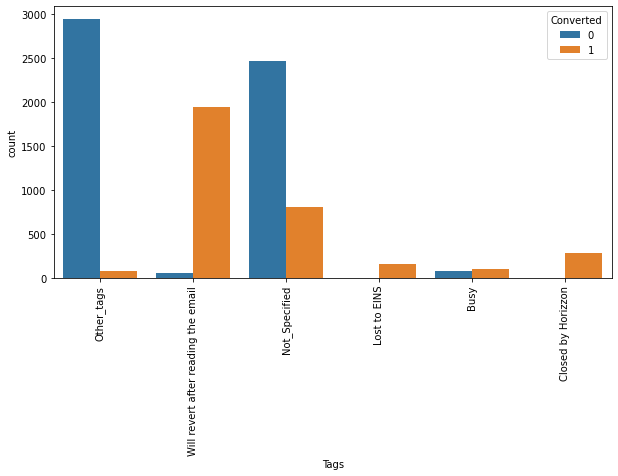

Not converted Mumbai                         4299
Thane & Outskirts               413
Other Cities                    408
Other Cities of Maharashtra     250
Other Metro Cities              223
Tier II Cities                   49
Name: City, dtype: int64 

Converted Mumbai                         2480
Thane & Outskirts               333
Other Cities                    272
Other Cities of Maharashtra     197
Other Metro Cities              154
Tier II Cities                   25
Name: City, dtype: int64 




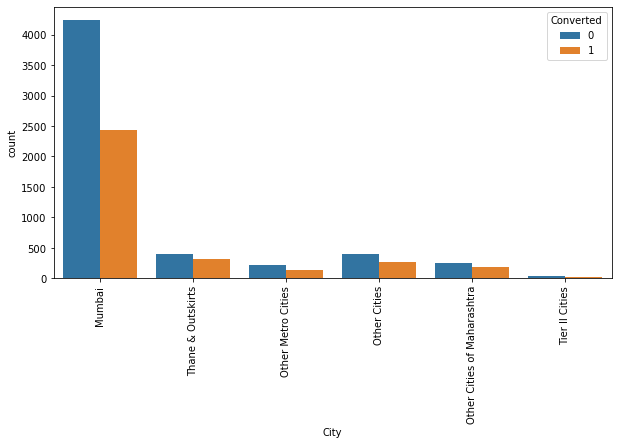

Not converted Modified                        2587
Email Opened                    1783
SMS Sent                         664
Page Visited on Website          225
Olark Chat Conversation          158
Email Link Clicked               128
Email Bounced                     51
Unsubscribed                      33
Unreachable                       10
Had a Phone Conversation           1
View in browser link Clicked       1
Form Submitted on Website          1
Name: Last Notable Activity, dtype: int64 

Converted SMS Sent                    1508
Email Opened                1044
Modified                     683
Page Visited on Website       93
Email Link Clicked            45
Olark Chat Conversation       25
Unreachable                   22
Unsubscribed                  14
Had a Phone Conversation      13
Email Bounced                  9
Email Marked Spam              2
Approached upfront             1
Resubscribed to emails         1
Email Received                 1
Name: Last Notable Activit

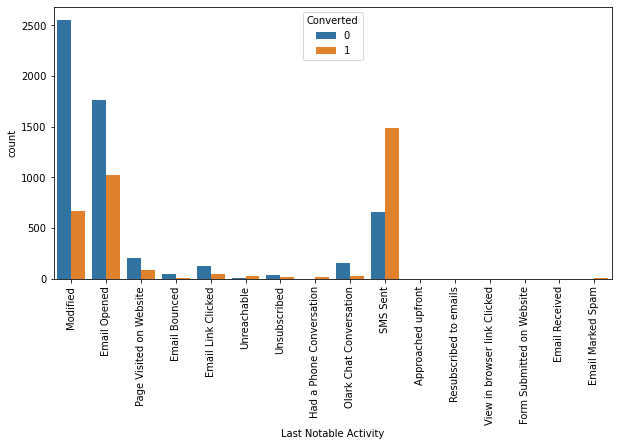

In [63]:
# interpretation can be done for all categorical variables by plotting their distribution %.
x=lead_data.drop("Prospect ID", axis=1)
for i in x.columns:
    
    if(x[i].dtypes=="object"):
        print("Not converted",df_0[i].value_counts(),"\n")
        print("Converted",df_1[i].value_counts(),"\n\n")
        plt.figure(figsize=(10,5))
        s1=sns.countplot(lead_data[i], hue=lead_data.Converted)
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
        plt.show()

In [64]:
# check distribution of values for last notable activity
lead_data["Last Notable Activity"].value_counts(normalize=True,dropna=False)

Modified                        0.360103
Email Opened                    0.311516
SMS Sent                        0.239361
Page Visited on Website         0.032168
Olark Chat Conversation         0.020328
Email Link Clicked              0.018988
Email Bounced                   0.006590
Unsubscribed                    0.005138
Unreachable                     0.003574
Had a Phone Conversation        0.001452
Email Marked Spam               0.000223
Approached upfront              0.000112
Resubscribed to emails          0.000112
View in browser link Clicked    0.000112
Form Submitted on Website       0.000112
Email Received                  0.000112
Name: Last Notable Activity, dtype: float64

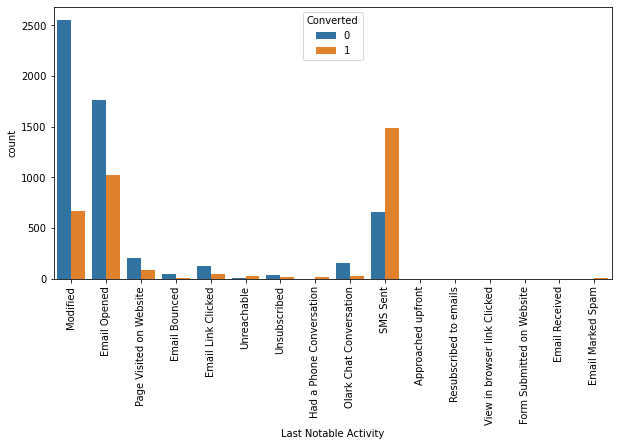

['Modified' 'Email Opened' 'Page Visited on Website' 'Email Bounced'
 'Email Link Clicked' 'Unreachable' 'Unsubscribed'
 'Had a Phone Conversation' 'Olark Chat Conversation' 'SMS Sent'
 'Approached upfront' 'Resubscribed to emails'
 'View in browser link Clicked' 'Form Submitted on Website'
 'Email Received' 'Email Marked Spam']


In [65]:
# visulaize the distribution
plt.figure(figsize=(10,5))
s1=sns.countplot(lead_data["Last Notable Activity"], hue=lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

print(lead_data["Last Notable Activity"].unique())

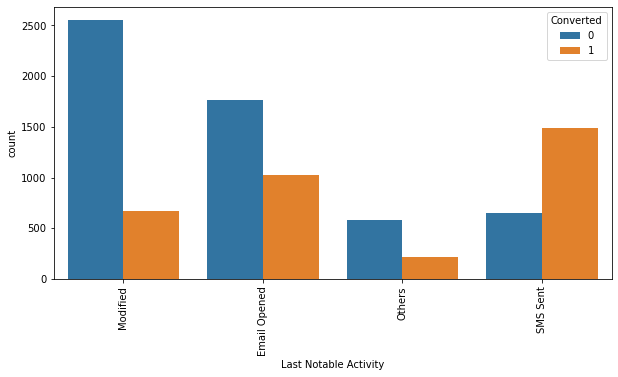

In [66]:
# Combining variables with low frequency as they have similar distribution.
lead_data["Last Notable Activity"]=lead_data["Last Notable Activity"].replace(['Page Visited on Website','Email Bounced',
 'Email Link Clicked','Unreachable','Unsubscribed',
 'Had a Phone Conversation','Olark Chat Conversation',
 'Approached upfront','Resubscribed to emails',
 'View in browser link Clicked','Form Submitted on Website',
 'Email Received','Email Marked Spam'],"Others")

plt.figure(figsize=(10,5))
s1=sns.countplot(lead_data["Last Notable Activity"], hue=lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

## To conclude for this dataset to convert to dummy variables.
##### for better business understanding following things to be considered for better business understanding.
#### Not_Specified present in tags, what matters most to you in choosing a course,what is your current occupation,Specialization
#### Others present in Last Activity, Lead Source, Last Notable Activity.

In [67]:
# creating dummy variable so first check how many object variables are existing with number of unique values in them.
lead_data.describe(include=object)

,Prospect ID,Lead Origin,Lead Source,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,Last Notable Activity
count,8953,8953,8953,8953,8953,8953,8953,8953,8953,8953
unique,8953,4,7,3,11,5,2,6,6,4
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,Landing Page Submission,Google,Email Opened,Management_Specialization,Unemployed,Better Career Prospects & others,Not_Specified,Mumbai,Modified
freq,1,4769,2841,3390,4126,5410,6292,3284,6687,3224


In [68]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.

dummy1 = pd.get_dummies(lead_data[["City","Lead Origin"]], drop_first=True)
# Adding the results to the master dataframe
lead_data=pd.concat([lead_data,dummy1], axis=1)
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Others,Not_Specified,Unemployed,Better Career Prospects & others,Other_tags,Mumbai,0,Modified,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Not_Specified,Unemployed,Better Career Prospects & others,Other_tags,Mumbai,0,Email Opened,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects & others,Will revert after reading the email,Mumbai,1,Email Opened,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Better Career Prospects & others,Other_tags,Mumbai,0,Modified,0,0,0,0,0,1,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Others,Not_Specified,Unemployed,Better Career Prospects & others,Will revert after reading the email,Mumbai,0,Modified,0,0,0,0,0,1,0,0


In [69]:
#Dropping duplicate variables for which dummy is made
Cols_to_drop=[]
Cols_to_drop=["City","Lead Origin"]
lead_data.drop(Cols_to_drop,axis=1,inplace=True)
lead_data.head()

,Prospect ID,Lead Number,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,A free copy of Mastering The Interview,Last Notable Activity,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,Olark Chat,0,0.0,0,0.0,Others,Not_Specified,Unemployed,Better Career Prospects & others,Other_tags,0,Modified,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,Organic Search,0,5.0,674,2.5,Email Opened,Not_Specified,Unemployed,Better Career Prospects & others,Other_tags,0,Email Opened,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects & others,Will revert after reading the email,1,Email Opened,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Better Career Prospects & others,Other_tags,0,Modified,0,0,0,0,0,1,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Google,1,2.0,1428,1.0,Others,Not_Specified,Unemployed,Better Career Prospects & others,Will revert after reading the email,0,Modified,0,0,0,0,0,1,0,0


In [70]:
# Creating a dummy variable for some of categorical variables where Not_specified is present
lead_data = pd.get_dummies(lead_data,columns=["Tags","What matters most to you in choosing a course","What is your current occupation","Specialization"])
Cols_to_drop = ["Tags_Not_Specified","What matters most to you in choosing a course_Not_Specified","What is your current occupation_Not_Specified","Specialization_Not_Specified"]
lead_data.drop(Cols_to_drop, axis=1, inplace=True)
lead_data.head()

,Prospect ID,Lead Number,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Other_tags,Tags_Will revert after reading the email,What matters most to you in choosing a course_Better Career Prospects & others,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specialization,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,Olark Chat,0,0.0,0,0.0,Others,0,Modified,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,Organic Search,0,5.0,674,2.5,Email Opened,0,Email Opened,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Direct Traffic,1,2.0,1532,2.0,Email Opened,1,Email Opened,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Direct Traffic,0,1.0,305,1.0,Others,0,Modified,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Google,1,2.0,1428,1.0,Others,0,Modified,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [71]:
# Creating a dummy variable for some of categorical variables where Others is present
lead_data = pd.get_dummies(lead_data,columns=["Last Activity","Lead Source","Last Notable Activity"])
Cols_to_drop3 = ["Last Activity_Others","Lead Source_Others","Last Notable Activity_Others"]
lead_data.drop(Cols_to_drop3, axis=1, inplace=True)
lead_data.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Other_tags,Tags_Will revert after reading the email,What matters most to you in choosing a course_Better Career Prospects & others,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specialization,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Last Activity_Email Opened,Last Activity_SMS Sent,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Welingak Website,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


## Step 4: Test-Train split

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
# Putting feature variable to X
X = lead_data.drop(['Lead Number','Prospect ID','Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Other_tags,Tags_Will revert after reading the email,What matters most to you in choosing a course_Better Career Prospects & others,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specialization,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Last Activity_Email Opened,Last Activity_SMS Sent,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Welingak Website,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
3,1.0,305,1.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,2.0,1428,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [74]:
y=lead_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [75]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step 5: Feature Scaling

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
scaler = StandardScaler()

X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.fit_transform(X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Other_tags,Tags_Will revert after reading the email,What matters most to you in choosing a course_Better Career Prospects & others,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specialization,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Last Activity_Email Opened,Last Activity_SMS Sent,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Welingak Website,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
9196,0.668862,1.848117,1.455819,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
4696,-0.030697,-0.037832,0.399961,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1
3274,0.319082,-0.642138,-0.127967,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
2164,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1667,0.319082,1.258415,-0.481679,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0


## Step 6: Looking at Correlations

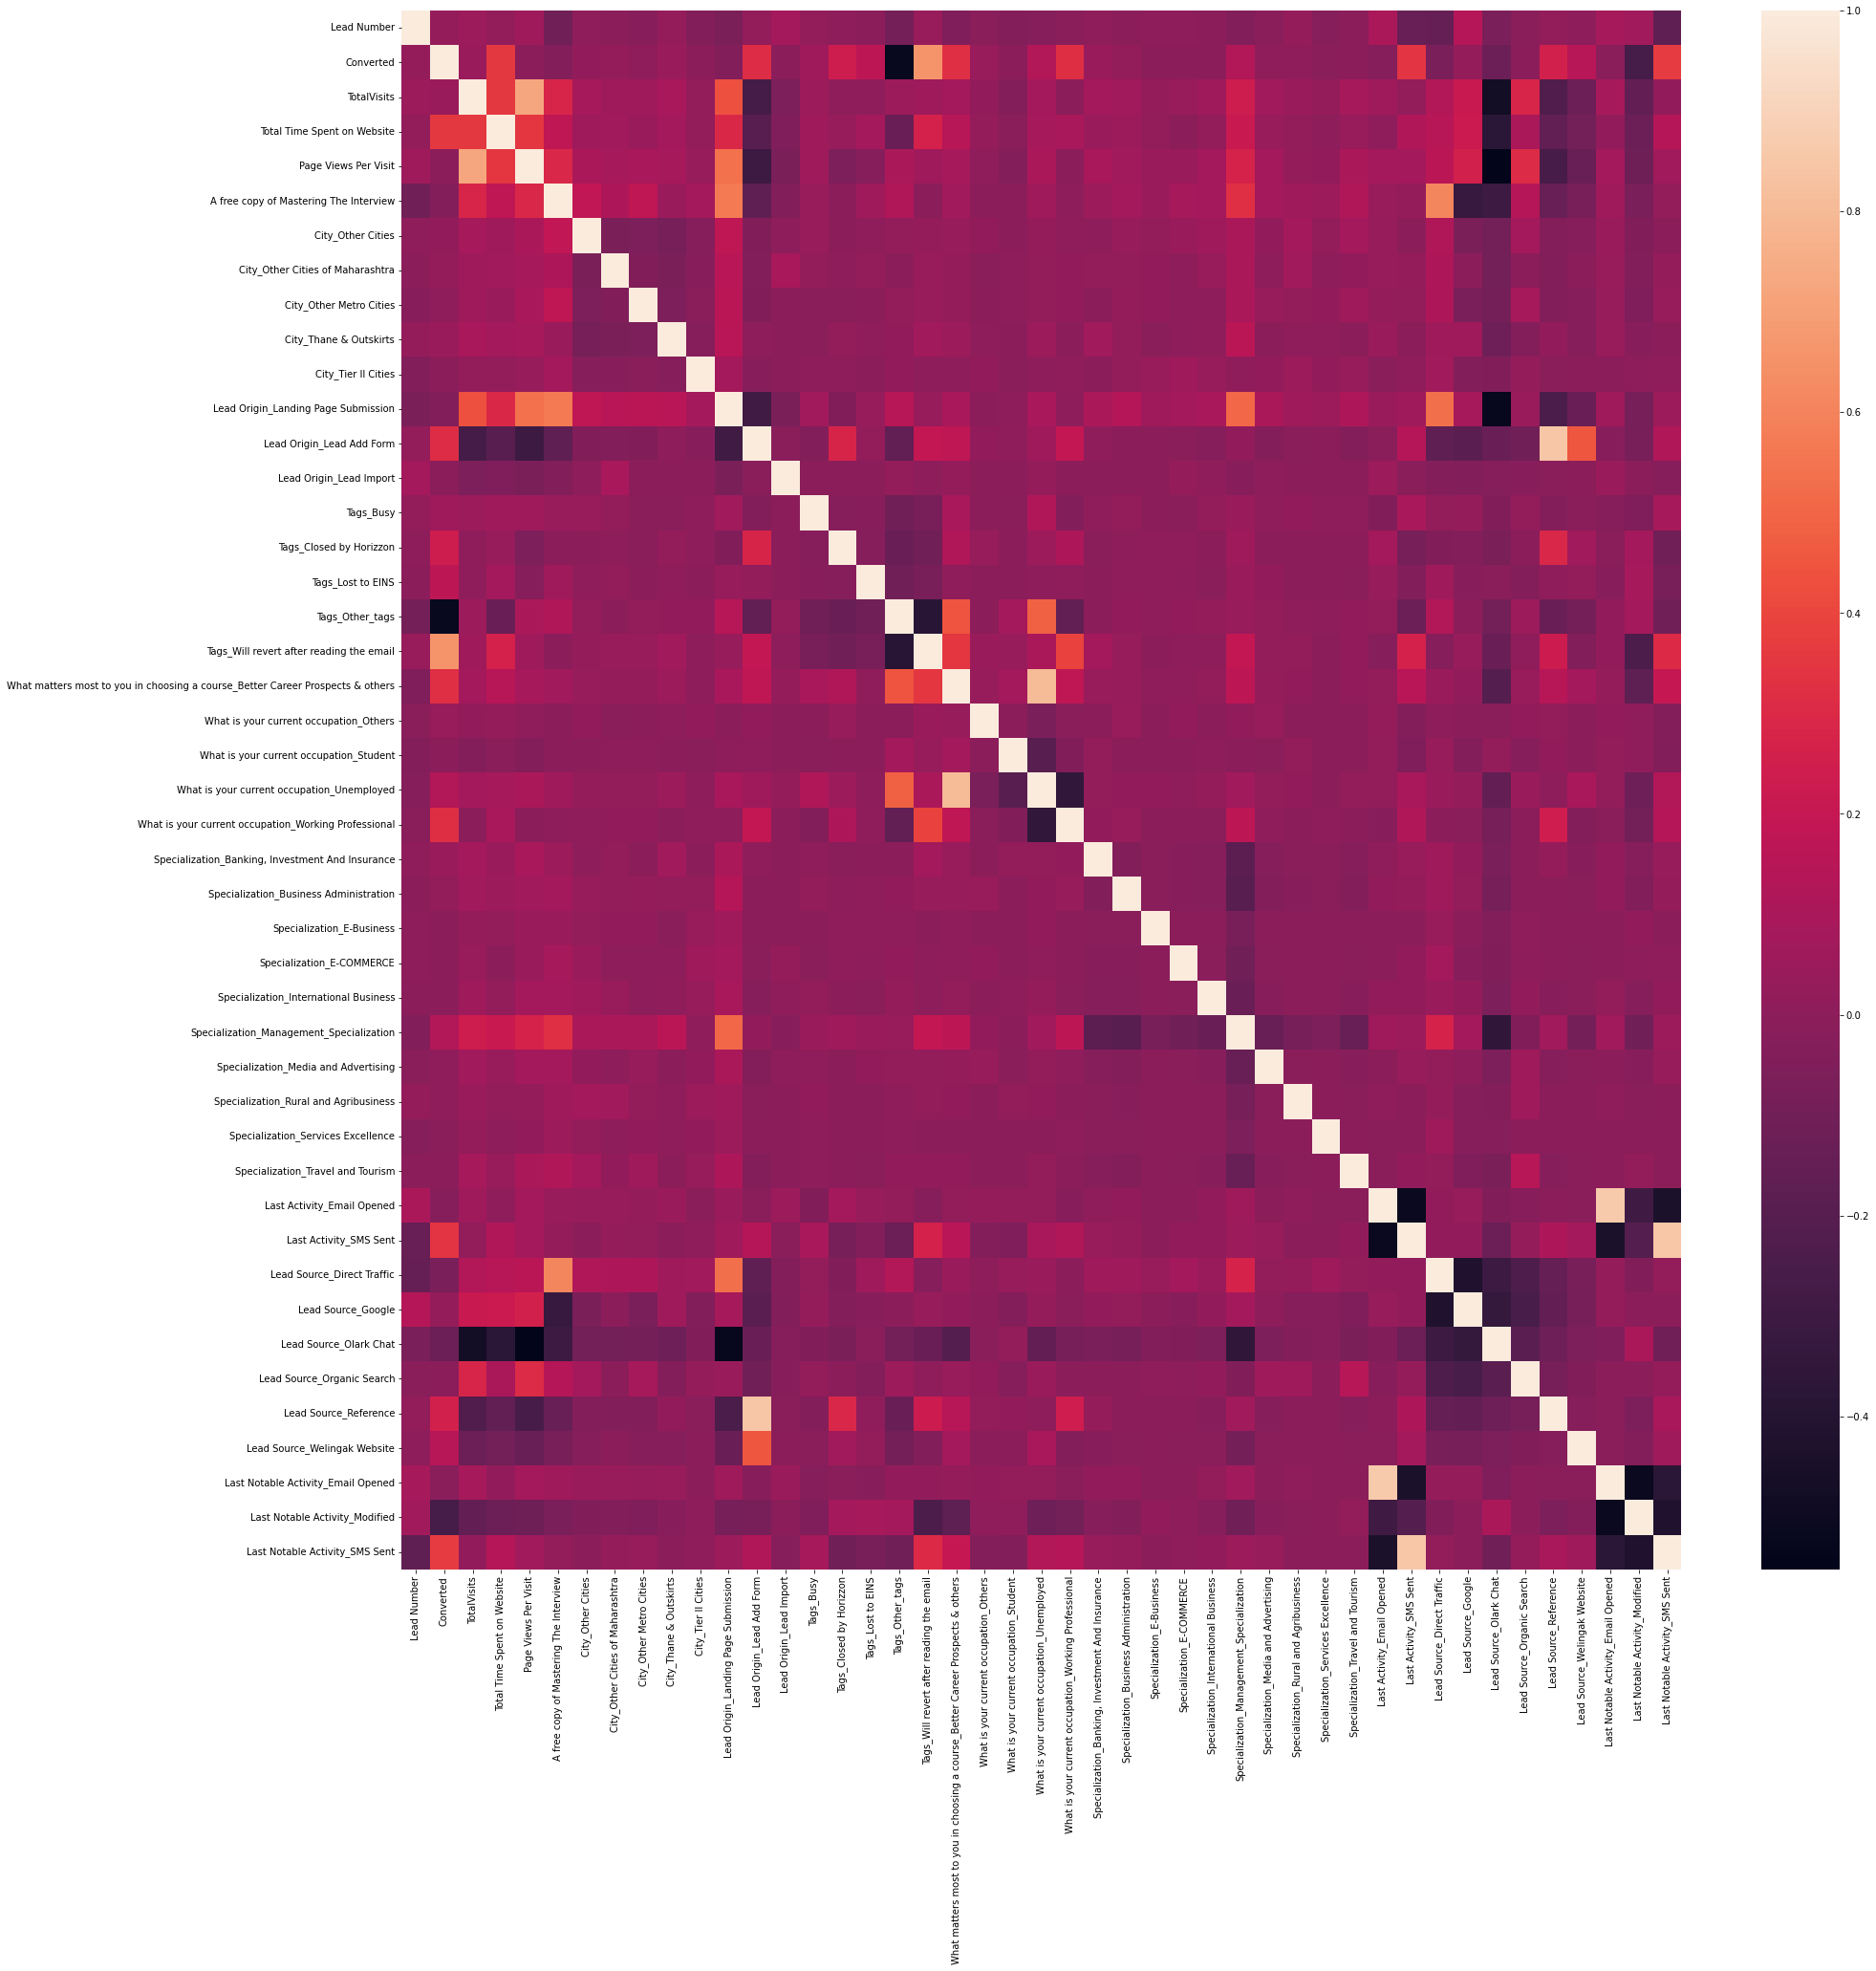

In [78]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,30))        # Size of the figure
sns.heatmap(lead_data.corr(),annot = False)
plt.show()

In [79]:
print("Top correlations")
c=lead_data.corr()
c = c.where(np.triu(np.ones(c.shape), k=1).astype(np.bool))
c = c.abs().unstack().transpose()
c=c.sort_values( ascending=False)
c=c.dropna()
c.head(10)

Top correlations


Last Notable Activity_Email Opened          Last Activity_Email Opened                                                        0.861683
Last Notable Activity_SMS Sent              Last Activity_SMS Sent                                                            0.853689
Lead Source_Reference                       Lead Origin_Lead Add Form                                                         0.845017
What is your current occupation_Unemployed  What matters most to you in choosing a course_Better Career Prospects & others    0.803602
Page Views Per Visit                        TotalVisits                                                                       0.721126
Tags_Will revert after reading the email    Converted                                                                         0.654624
Lead Source_Direct Traffic                  A free copy of Mastering The Interview                                            0.607037
Lead Origin_Landing Page Submission         A free copy

In [80]:

X_train=X_train.drop(['Last Activity_Email Opened','Last Activity_SMS Sent','Page Views Per Visit','Lead Origin_Landing Page Submission'], axis=1)

In [81]:
print("Top correlations")
c=X_train.corr()
c = c.where(np.triu(np.ones(c.shape), k=1).astype(np.bool))
c = c.abs().unstack().transpose()
c=c.sort_values( ascending=False)
c=c.dropna()
c.head(10)

Top correlations


Lead Source_Reference                                                           Lead Origin_Lead Add Form                                                         0.835278
What is your current occupation_Unemployed                                      What matters most to you in choosing a course_Better Career Prospects & others    0.813894
Lead Source_Direct Traffic                                                      A free copy of Mastering The Interview                                            0.621806
Last Notable Activity_Modified                                                  Last Notable Activity_Email Opened                                                0.504621
Lead Source_Olark Chat                                                          TotalVisits                                                                       0.478878
What is your current occupation_Unemployed                                      Tags_Other_tags                                                  

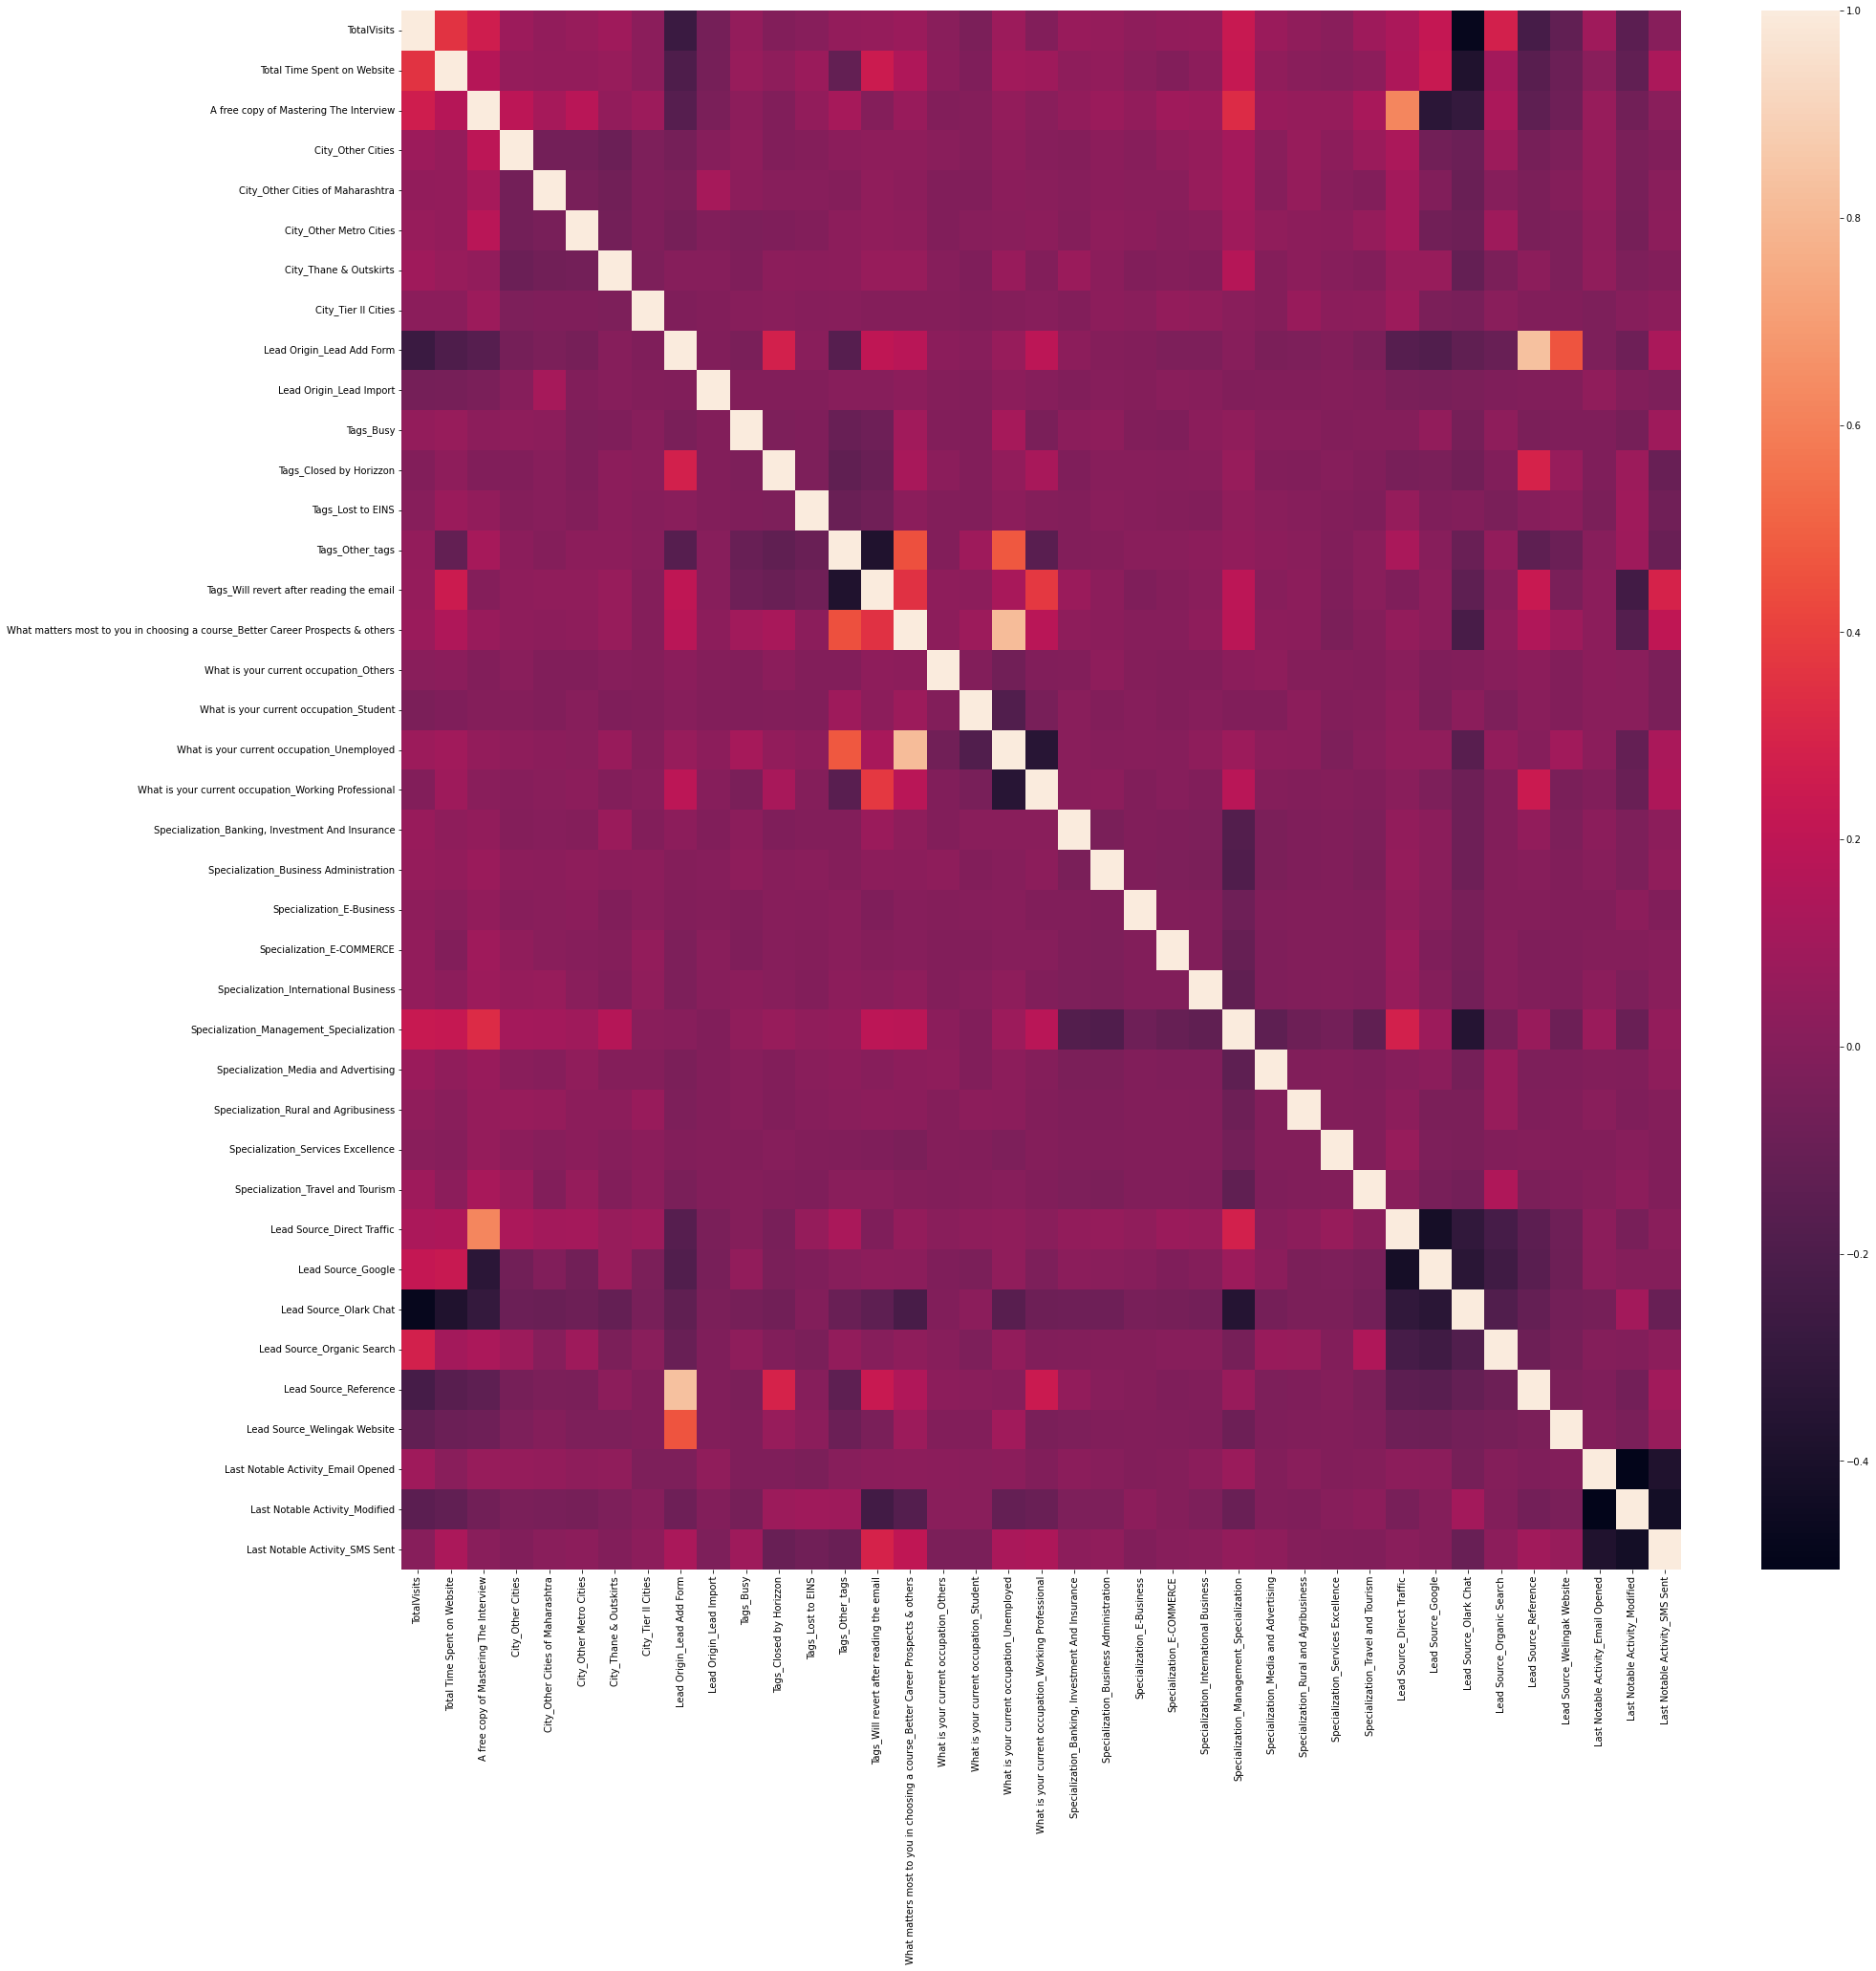

In [82]:
plt.figure(figsize = (30,30))        # Size of the figure
sns.heatmap(X_train.corr(),annot = False)
plt.show()

## Step7: Model building

In [83]:
import statsmodels.api as sm

In [84]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6227
Model Family:                Binomial   Df Model:                           39
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1120.3
Date:                Mon, 24 Apr 2023   Deviance:                       2240.6
Time:                        22:33:42   Pearson chi2:                 7.65e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.6214
Covariance Type:            nonrobust                                         
==================================================================================================================================================
                                                                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                             -2.9644      0.468     -6.334      0.000      -3.882      -2.047
TotalVisits                                                                        0.1159      0.072      1.617      0.106      -0.025       0.256
Total Time Spent on Website                                                        1.0695      0.065     16.352      0.000       0.941       1.198
A free copy of Mastering The Interview                                            -0.2222      0.188     -1.182      0.237      -0.591       0.146
City_Other Cities                                                                  0.3011      0.235      1.281      0.200      -0.160       0.762
City_Other Cities of Maharashtra                                                  -0.0771      0.294     -0.262      0.793      -0.653       0.499
City_Other Metro Cities                                                            0.0454      0.313      0.145      0.885      -0.569       0.659
City_Thane & Outskirts                                                            -0.0244      0.236     -0.103      0.918      -0.488       0.439
City_Tier II Cities                                                                0.3410      0.587      0.581      0.561      -0.809       1.491
Lead Origin_Lead Add Form                                                          1.5626      1.052      1.486      0.137      -0.499       3.624
Lead Origin_Lead Import                                                            0.5799      0.916      0.633      0.527      -1.215       2.374
Tags_Busy                                                                         -0.9106      0.269     -3.384      0.001      -1.438      -0.383
Tags_Closed by Horizzon                                                            5.2362      1.030      5.085      0.000       3.218       7.254
Tags_Lost to EINS                                                                  4.7597      0.624      7.626      0.000       3.536       5.983
Tags_Other_tags                                                                   -4.4830      0.210    -21.347      0.000      -4.895      -4.071
Tags_Will revert after reading the email                                           2.7739      0.232     11.956      0.000       2.319       3.229
What matters most to you in choosing a course_Better Career Prospects & others    22.4411   1.47e+04      0.002      0.999   -2.89e+04    2.89e+04
What is your current occupation_Others                                           -20.0895   1.47e+04     -0.001      0.999   -2.89e+04    2.89e

## Step 8: Feature Selection Using RFE

In [85]:
from sklearn.linear_model import LogisticRegression
logreg =LogisticRegression()

In [86]:
from sklearn.feature_selection import RFE
rfe=RFE(logreg,n_features_to_select=15)
# running RFE 
rfe =rfe.fit(X_train,y_train)

In [87]:
rfe.support_

array([False,  True, False, False, False, False, False, False,  True,
       False,  True,  True,  True,  True,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True,  True, False,  True, False, False,  True,
        True, False,  True])

In [88]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 17),
 ('Total Time Spent on Website', True, 1),
 ('A free copy of Mastering The Interview', False, 7),
 ('City_Other Cities', False, 6),
 ('City_Other Cities of Maharashtra', False, 18),
 ('City_Other Metro Cities', False, 24),
 ('City_Thane & Outskirts', False, 23),
 ('City_Tier II Cities', False, 5),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 10),
 ('Tags_Busy', True, 1),
 ('Tags_Closed by Horizzon', True, 1),
 ('Tags_Lost to EINS', True, 1),
 ('Tags_Other_tags', True, 1),
 ('Tags_Will revert after reading the email', True, 1),
 ('What matters most to you in choosing a course_Better Career Prospects & others',
  True,
  1),
 ('What is your current occupation_Others', False, 12),
 ('What is your current occupation_Student', False, 8),
 ('What is your current occupation_Unemployed', False, 9),
 ('What is your current occupation_Working Professional', True, 1),
 ('Specialization_Banking, Investment And Insurance', False, 2),
 ('S

In [89]:
col = X_train.columns[rfe.support_]

In [90]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'A free copy of Mastering The Interview',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities', 'Lead Origin_Lead Import',
       'What is your current occupation_Others',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specialization',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Last Notable Activity_Modified'],
      dtype='object')

#### Assessing the model with StatsModels


In [91]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1126.2
Date:                Mon, 24 Apr 2023   Deviance:                       2252.5
Time:                        22:33:44   Pearson chi2:                 7.79e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6206
Covariance Type:            nonrobust                                         
==================================================================================================================================================
                                                                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                             -2.9712      0.136    -21.798      0.000      -3.238      -2.704
Total Time Spent on Website                                                        1.0544      0.064     16.510      0.000       0.929       1.180
Lead Origin_Lead Add Form                                                          1.6664      0.436      3.820      0.000       0.811       2.521
Tags_Busy                                                                         -0.9620      0.261     -3.687      0.000      -1.473      -0.451
Tags_Closed by Horizzon                                                            5.1468      1.024      5.024      0.000       3.139       7.155
Tags_Lost to EINS                                                                  4.7267      0.621      7.607      0.000       3.509       5.944
Tags_Other_tags                                                                   -4.5146      0.206    -21.955      0.000      -4.918      -4.112
Tags_Will revert after reading the email                                           2.7178      0.220     12.335      0.000       2.286       3.150
What matters most to you in choosing a course_Better Career Prospects & others     2.3114      0.153     15.060      0.000       2.011       2.612
What is your current occupation_Working Professional                               0.8051      0.422      1.909      0.056      -0.022       1.632
Specialization_Travel and Tourism                                                 -0.8333      0.487     -1.711      0.087      -1.788       0.121
Lead Source_Direct Traffic                                                        -0.4821      0.142     -3.403      0.001      -0.760      -0.204
Lead Source_Olark Chat                                                             0.7800      0.161      4.849      0.000       0.465       1.095
Lead Source_Welingak Website                                                       2.8588      1.106      2.585      0.010       0.691       5.027
Last Notable Activity_Email Opened                                                 0.8231      0.136      6.053      0.000       0.557       1.090
Last Notable Activity_SMS Sent                                                     2.9259      0.151     19.336      0.000       2.629       3.223
==================================================================================================================================================
"""

In [92]:
# What is your current occupation_Working Professional, Lead Source_Welingak Website & Specialization_Travel and Tourism have high p-value, so drop these variables
col=col.drop(['What is your current occupation_Working Professional','Specialization_Travel and Tourism','Lead Source_Welingak Website'],1)

In [93]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6254
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1135.4
Date:                Mon, 24 Apr 2023   Deviance:                       2270.8
Time:                        22:33:44   Pearson chi2:                 8.19e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6195
Covariance Type:            nonrobust                                         
==================================================================================================================================================
                                                                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                             -2.9840      0.136    -22.004      0.000      -3.250      -2.718
Total Time Spent on Website                                                        1.0570      0.064     16.553      0.000       0.932       1.182
Lead Origin_Lead Add Form                                                          2.5979      0.348      7.473      0.000       1.917       3.279
Tags_Busy                                                                         -1.0491      0.259     -4.045      0.000      -1.557      -0.541
Tags_Closed by Horizzon                                                            5.0198      1.019      4.928      0.000       3.023       7.016
Tags_Lost to EINS                                                                  4.7071      0.622      7.563      0.000       3.487       5.927
Tags_Other_tags                                                                   -4.6243      0.204    -22.682      0.000      -5.024      -4.225
Tags_Will revert after reading the email                                           2.6924      0.210     12.793      0.000       2.280       3.105
What matters most to you in choosing a course_Better Career Prospects & others     2.3938      0.152     15.715      0.000       2.095       2.692
Lead Source_Direct Traffic                                                        -0.4677      0.141     -3.319      0.001      -0.744      -0.192
Lead Source_Olark Chat                                                             0.7719      0.161      4.802      0.000       0.457       1.087
Last Notable Activity_Email Opened                                                 0.8258      0.135      6.110      0.000       0.561       1.091
Last Notable Activity_SMS Sent                                                     2.9192      0.151     19.351      0.000       2.624       3.215
==================================================================================================================================================
"""

Since 'All' the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables

In [94]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [95]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,What matters most to you in choosing a course_...,10.29
5,Tags_Other_tags,5.25
6,Tags_Will revert after reading the email,3.75
11,Last Notable Activity_SMS Sent,1.74
1,Lead Origin_Lead Add Form,1.55
10,Last Notable Activity_Email Opened,1.54
3,Tags_Closed by Horizzon,1.49
0,Total Time Spent on Website,1.46
8,Lead Source_Direct Traffic,1.43
9,Lead Source_Olark Chat,1.41


In [96]:
col=col.drop(['What matters most to you in choosing a course_Better Career Prospects & others'],1)

In [97]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Tags_Will revert after reading the email,1.74
10,Last Notable Activity_SMS Sent,1.62
1,Lead Origin_Lead Add Form,1.49
9,Last Notable Activity_Email Opened,1.45
0,Total Time Spent on Website,1.44
5,Tags_Other_tags,1.43
7,Lead Source_Direct Traffic,1.42
8,Lead Source_Olark Chat,1.35
3,Tags_Closed by Horizzon,1.17
2,Tags_Busy,1.05


In [146]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6255
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1268.4
Date:                Mon, 24 Apr 2023   Deviance:                       2536.9
Time:                        22:37:21   Pearson chi2:                 8.50e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6030
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.4789      0.120    -20.662      0.000      -2.714      -2.244
Total Time Spent on Website                  1.0814      0.061     17.820      0.000       0.962       1.200
Lead Origin_Lead Add Form                    3.6828      0.312     11.800      0.000       3.071       4.294
Tags_Busy                                    0.7109      0.233      3.049      0.002       0.254       1.168
Tags_Closed by Horizzon                      6.7735      1.016      6.668      0.000       4.783       8.764
Tags_Lost to EINS                            5.6049      0.608      9.212      0.000       4.412       6.797
Tags_Other_tags                             -2.9731      0.168    -17.717      0.000      -3.302      -2.644
Tags_Will revert after reading the email     4.4724      0.185     24.189      0.000       4.110       4.835
Lead Source_Direct Traffic                  -0.5416      0.135     -3.998      0.000      -0.807      -0.276
Lead Source_Olark Chat                       0.9617      0.148      6.479      0.000       0.671       1.253
Last Notable Activity_Email Opened           1.0366      0.126      8.242      0.000       0.790       1.283
Last Notable Activity_SMS Sent               3.0727      0.142     21.658      0.000       2.795       3.351
============================================================================================================
"""

Since all VIF values are within range we can move ahead to derive the Probabilities, Lead Score, Predictions on Train Data

In [98]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.415387
4696    0.057169
3274    0.322239
2164    0.004596
1667    0.986049
7024    0.521389
8018    0.041725
778     0.024786
6942    0.004658
4440    0.048497
dtype: float64

In [99]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.4153872 , 0.05716878, 0.32223912, 0.00459606, 0.98604939,
       0.52138898, 0.04172486, 0.02478568, 0.00465802, 0.04849729])

Creating a dataframe with the actual conversion rate and the predicted probabilities¶

In [100]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID
0,1,0.415387,9196
1,0,0.057169,4696
2,0,0.322239,3274
3,0,0.004596,2164
4,1,0.986049,1667


Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [101]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,predicted
0,1,0.415387,9196,0
1,0,0.057169,4696,0
2,0,0.322239,3274,0
3,0,0.004596,2164,0
4,1,0.986049,1667,1


In [102]:
from sklearn import metrics

In [103]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3734  148]
 [ 252 2133]]


In [ ]:
# Predicted     not_convert    convert
# Actual
# not_convert        3734      148
# convert            252       2133  

In [105]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9361736077868198


## Metrics beyond simply accuracy

In [106]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [107]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8943396226415095

In [108]:
# Let us calculate specificity
TN / float(TN+FP)

0.9618753219989696

In [109]:
# Calculate false postive rate - predicting converted when customer does not have convert
print(FP/ float(TN+FP))

0.0381246780010304


In [110]:
# positive predictive value 
print (TP / float(TP+FP))

0.9351161771153003


In [111]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9367787255393879


## Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [112]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [113]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

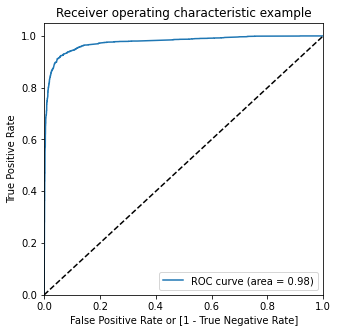

In [114]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

## Step 10: Finding Optimal Cutoff Point

In [115]:
#Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [116]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.415387,9196,0,1,1,1,1,1,0,0,0,0,0
1,0,0.057169,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.322239,3274,0,1,1,1,1,0,0,0,0,0,0
3,0,0.004596,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.986049,1667,1,1,1,1,1,1,1,1,1,1,1


In [117]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.893729  0.964780  0.850077
0.2   0.2  0.911122  0.950524  0.886914
0.3   0.3  0.924525  0.937945  0.916280
0.4   0.4  0.934897  0.914885  0.947192
0.5   0.5  0.936174  0.894340  0.961875
0.6   0.6  0.932504  0.868344  0.971922
0.7   0.7  0.928195  0.848637  0.977074
0.8   0.8  0.918143  0.812159  0.983256
0.9   0.9  0.885910  0.714465  0.991242


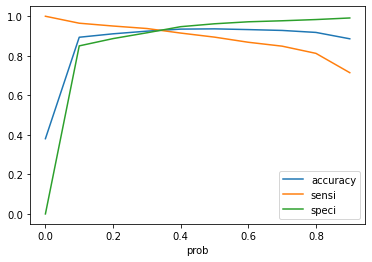

In [118]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [119]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.415387,9196,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.057169,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.322239,3274,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.004596,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.986049,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [120]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9331418541566938

In [121]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3644,  238],
       [ 181, 2204]], dtype=int64)

In [122]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [123]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9241090146750525

In [124]:
# Let us calculate specificity
TN / float(TN+FP)

0.9386913961875322

In [125]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.0613086038124678


In [126]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9025389025389026


In [127]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9526797385620915


# Precision and Recall

In [128]:
#Looking at the confusion matrix again

In [129]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3734,  148],
       [ 252, 2133]], dtype=int64)

Precision
TP / TP + FP

In [130]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9351161771153003

##### Recall
TP / TP + FN

In [131]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8943396226415095

In [132]:
#Using sklearn utilities for the same

In [133]:
from sklearn.metrics import precision_score, recall_score

In [134]:
?precision_score

In [135]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9351161771153003

In [136]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8943396226415095

## Precision and recall tradeoff

In [137]:
from sklearn.metrics import precision_recall_curve

In [138]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       0
 2       0
 3       0
 4       1
        ..
 6262    1
 6263    1
 6264    0
 6265    0
 6266    1
 Name: Converted, Length: 6267, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6262    1
 6263    1
 6264    0
 6265    0
 6266    1
 Name: predicted, Length: 6267, dtype: int64)

In [139]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

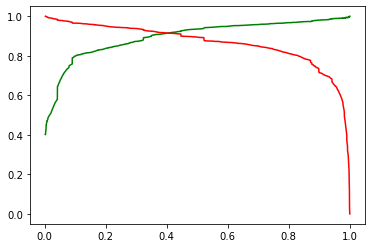

In [140]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Step 11: Making predictions on the test set

In [141]:
X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.transform(X_test[["TotalVisits","Total Time Spent on Website", 'Page Views Per Visit']])
X_test=X_test.drop(['Last Activity_Email Opened','Last Activity_SMS Sent','Page Views Per Visit','Lead Origin_Landing Page Submission'], axis=1)

In [142]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Other_tags,Tags_Will revert after reading the email,Lead Source_Direct Traffic,Lead Source_Olark Chat,Last Notable Activity_Email Opened,Last Notable Activity_SMS Sent
7681,-0.304384,0,0,0,0,1,0,1,0,0,1
984,-0.538073,0,0,0,0,1,0,0,0,0,0
8135,0.794688,0,0,0,0,0,0,1,0,0,1
6915,-0.614753,0,0,0,0,1,0,0,0,1,0
2712,-0.412100,0,0,0,0,0,1,0,0,1,0


In [143]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [147]:
y_test_pred = res.predict(X_test_sm)

In [148]:
y_test_pred[:10]

7681    0.037323
984     0.002390
8135    0.713324
6915    0.006180
2712    0.929854
244     0.005365
4698    0.001832
8287    0.078678
6791    0.976560
8970    0.003143
dtype: float64

In [149]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [150]:
y_pred_1.head()

,0
7681,0.037323
984,0.002390
8135,0.713324
6915,0.006180
2712,0.929854


In [151]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [152]:
# Putting ProspectID to index
y_test_df['Prospect ID'] = y_test_df.index

In [153]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [154]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [155]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.037323
1,0,984,0.002390
2,0,8135,0.713324
3,0,6915,0.006180
4,1,2712,0.929854


In [156]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [174]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Conversion_Prob']]
y_pred_final['Lead_Score'] = y_pred_final.Conversion_Prob.map( lambda x: round(x*100))

In [176]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Conversion_Prob,Lead_Score
0,7681,0,0.037323,4
1,984,0,0.002390,0
2,8135,0,0.713324,71
3,6915,0,0.006180,1
4,2712,1,0.929854,93


In [177]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [178]:
y_pred_final.head()

,Prospect ID,Converted,Conversion_Prob,Lead_Score,final_predicted
0,7681,0,0.037323,4,0
1,984,0,0.002390,0,0
2,8135,0,0.713324,71,1
3,6915,0,0.006180,1,0
4,2712,1,0.929854,93,1


In [179]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9285182427401341

In [180]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1581,   95],
       [  97,  913]], dtype=int64)

In [181]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [182]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.903960396039604

In [183]:
# Let us calculate specificity
TN / float(TN+FP)

0.9433174224343676

Observation:

After running the model on the Test Data these are the figures we obtain:

Accuracy : 92.85%

Sensitivity : 90.39%

Specificity : 94.33%

Final Observation:

Let us compare the values obtained for Train & Test:

Train Data:

Accuracy : 93.31%

Sensitivity :92.41%

Specificity :93.86%

Test Data:

Accuracy : 92.85%

Sensitivity : 90.39%

Specificity : 94.33%

This model seems to predict the conversion rate very well and can be used for further analysis.